VALORANT MATCH PREDICTOR

IMPORTO LOS DATOS DE VLR 

In [76]:
link_estadisticas_jugadores_kickoff_emea = 'https://www.vlr.gg/event/stats/2276/champions-tour-2025-emea-kickoff'
link_estadisticas_agentes_kikcoff_emea = 'https://www.vlr.gg/event/agents/2276/champions-tour-2025-emea-kickoff'
link_estadisticas_jugadores_kickoff_americas = 'https://www.vlr.gg/event/stats/2274/champions-tour-2025-americas-kickoff'
link_estadisticas_agentes_kikcoff_americas = 'https://www.vlr.gg/event/agents/2274/champions-tour-2025-americas-kickoff'
link_estadisticas_jugadores_kickoff_pac = 'https://www.vlr.gg/event/stats/2277/champions-tour-2025-pacific-kickoff'
link_estadisticas_agentes_kikcoff_pac = 'https://www.vlr.gg/event/agents/2277/champions-tour-2025-pacific-kickoff'

LIBRERIAS IMPORTANTES

In [77]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.special import expit  # Función sigmoide

CREACION DE DATAFRAMES

In [78]:
#Creacion del dataframe de los partidos del kickoff de emea
try:
    tabla_emea = pd.read_html(link_estadisticas_jugadores_kickoff_emea)
    print(f"Se encontraron {len(tabla_emea)} tabla(s).")
    data_jugadores_emea = tabla_emea[0]
except Exception as e:
    print("Error al leer las tablas:", e)

#Creacion del dataframe de los partidos del kickoff de americas
try:
    tabla_americas = pd.read_html(link_estadisticas_jugadores_kickoff_americas)
    print(f"Se encontraron {len(tabla_americas)} tabla(s).")
    data_jugadores_americas = tabla_americas[0]
except Exception as e:
    print("Error al leer las tablas:", e)
#Creacion del dataframe de los partidos del kickoff de pacifico
try:
    tabla_pac = pd.read_html(link_estadisticas_jugadores_kickoff_pac)
    print(f"Se encontraron {len(tabla_pac)} tabla(s).")
    data_jugadores_pac = tabla_pac[0]
except Exception as e:
    print("Error al leer las tablas:", e)

Se encontraron 1 tabla(s).
Se encontraron 1 tabla(s).
Se encontraron 1 tabla(s).


In [79]:
try:
    tabla = pd.read_html(link_estadisticas_agentes_kikcoff_emea)
    print(f"Se encontraron {len(tabla)} tabla(s).")
    data_agentes_emea = tabla[0]
except Exception as e:
    print("Error al leer las tablas:", e)

try:
    tabla = pd.read_html(link_estadisticas_agentes_kikcoff_americas)
    print(f"Se encontraron {len(tabla)} tabla(s).")
    data_agentes_americas = tabla[0]
except Exception as e:
    print("Error al leer las tablas:", e)

try:
    tabla = pd.read_html(link_estadisticas_agentes_kikcoff_pac)
    print(f"Se encontraron {len(tabla)} tabla(s).")
    data_agentes_pac = tabla[0]
except Exception as e:
    print("Error al leer las tablas:", e)

Se encontraron 8 tabla(s).
Se encontraron 8 tabla(s).
Se encontraron 8 tabla(s).


Como interesa las estadisticas de los equipos y no de los jugadores, cada una de las estadisticas de los 5 jugadores de cada equipo se agruparan realizando una media para que se tengan las estadisticas generales en cada equipo

In [80]:

tabla_jugadores_emea = data_jugadores_emea
tabla_jugadores_emea[['Player', 'Team']] = tabla_jugadores_emea['Player'].str.rsplit(' ', n=1, expand=True)
tabla_jugadores_emea.drop(columns=['Player'], inplace=True)
tabla_jugadores_emea.set_index('Team', inplace=True)

tabla_jugadores_americas = data_jugadores_americas
tabla_jugadores_americas[['Player', 'Team']] = tabla_jugadores_americas['Player'].str.rsplit(' ', n=1, expand=True)
tabla_jugadores_americas.drop(columns=['Player'], inplace=True)
tabla_jugadores_americas.set_index('Team', inplace=True)

tabla_jugadores_pac = data_jugadores_pac
tabla_jugadores_pac[['Player', 'Team']] = tabla_jugadores_pac['Player'].str.rsplit(' ', n=1, expand=True)
tabla_jugadores_pac.drop(columns=['Player'], inplace=True)
tabla_jugadores_pac.set_index('Team', inplace=True)


In [81]:
print(tabla_jugadores_emea.dtypes)


Agents     object
Rnd         int64
R2.0      float64
ACS       float64
K:D       float64
KAST       object
ADR       float64
KPR       float64
APR       float64
FKPR      float64
FDPR      float64
HS%        object
CL%        object
CL         object
KMax        int64
K           int64
D           int64
A           int64
FK          int64
FD          int64
dtype: object


Se finaliza la creacion del dataframe

In [82]:

df_jugadores_emea = tabla_jugadores_emea
df_jugadores_emea['KAST'] = df_jugadores_emea['KAST'].str.rstrip('%').astype(float) / 100
df_equipos_emea = df_jugadores_emea.groupby('Team').agg({
    "R2.0": "mean",
    "ACS": "mean",
    "K:D": "mean",
    "KAST": "mean",
    "ADR": "mean",
    "KPR": "mean",
    "APR": "mean",
    "FKPR": "mean",
    "FDPR": "mean"
}).reset_index()

df_jugadores_americas = tabla_jugadores_americas
df_jugadores_americas['KAST'] = df_jugadores_americas['KAST'].str.rstrip('%').astype(float) / 100
df_equipos_americas = df_jugadores_americas.groupby('Team').agg({
    "R2.0": "mean",
    "ACS": "mean",
    "K:D": "mean",
    "KAST": "mean",
    "ADR": "mean",
    "KPR": "mean",
    "APR": "mean",
    "FKPR": "mean",
    "FDPR": "mean"
}).reset_index()

df_jugadores_pac = tabla_jugadores_pac
df_jugadores_pac['KAST'] = df_jugadores_pac['KAST'].str.rstrip('%').astype(float) / 100
df_equipos_pac = df_jugadores_pac.groupby('Team').agg({
    "R2.0": "mean",
    "ACS": "mean",
    "K:D": "mean",
    "KAST": "mean",
    "ADR": "mean",
    "KPR": "mean",
    "APR": "mean",
    "FKPR": "mean",
    "FDPR": "mean"
}).reset_index()



In [83]:
df_equipos_pac.head(12)

,Team,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR
0,BME,0.966,188.300000,0.938000,0.738,122.780000,0.656,0.316,0.096000,0.100
1,DFM,0.974,191.380000,0.954000,0.704,125.660000,0.674,0.258,0.102000,0.100
2,DRX,1.056,203.240000,1.062000,0.750,134.940000,0.714,0.306,0.108000,0.090
3,GE,0.964,185.920000,0.948000,0.690,123.220000,0.652,0.246,0.092000,0.108
4,GEN,1.038,199.320000,1.086000,0.716,128.360000,0.706,0.284,0.094000,0.108
5,NS,1.026,201.000000,1.026000,0.754,130.460000,0.702,0.358,0.108000,0.092
6,PRX,1.008,202.540000,1.006000,0.740,134.660000,0.716,0.302,0.098000,0.100
7,RRQ,1.076,205.900000,1.102000,0.746,134.080000,0.724,0.314,0.104000,0.100
8,T1,0.990,191.683333,0.963333,0.720,128.583333,0.670,0.345,0.091667,0.100
9,TLN,0.934,185.680000,0.960000,0.698,120.460000,0.658,0.236,0.092000,0.104


Ajusto el index

In [84]:
df_equipos_emea.set_index('Team', inplace=True)
df_equipos_americas.set_index('Team', inplace=True)
df_equipos_pac.set_index('Team', inplace=True)

In [85]:
winrate_emea_BIND = {
    "Team":    ["APK", "BBL","FNC", "FUT", "GX", "KC", "M8", "MKOI", "NAVI","TH","TL" ,"VIT"],
    "Defense": [0    ,0.58  , 0   , 0.55 , 0.54, 0.68,0    ,0.5    ,0      ,0    ,0.53,0.59],
    "Attack":  [0    ,0.33  , 0   , 0.38 , 0.38, 0.58,0    ,0.36   ,0.17   ,0    ,0.54,0.54]
}
winrate_emea_final_BIND = pd.DataFrame(winrate_emea_BIND)
winrate_emea_final_BIND.set_index('Team', inplace=True)
emea_final_BIND = df_equipos_emea.join(winrate_emea_final_BIND.iloc[:, :])  
emea_final_BIND = emea_final_BIND.fillna(0).astype(float)
emea_final_BIND.head(12)

winrate_americas_BIND = {
    "Team":   ["100T", "2G", "C9", "EG", "FUR", "G2", "KRÜ", "LEV", "LOUD","MIBR","NRG", "SEN"],
    "Attack": [0.59  , 0   , 0   ,  0  , 0    , 0   ,0.58  ,0     ,0.25   ,0.48  ,0.5  ,0.58],
    "Defense":[0.35  , 0   , 0   ,  0  , 0    , 0   ,0.73  ,0     ,0.33   ,0.32  ,0.45 ,0.60]
}
winrate_americas_final_BIND = pd.DataFrame(winrate_americas_BIND)
winrate_americas_final_BIND.set_index('Team', inplace=True)
americas_final_BIND = df_equipos_americas.join(winrate_americas_final_BIND.iloc[:, :])  
americas_final_BIND = americas_final_BIND.fillna(0).astype(float)
americas_final_BIND.head(12)

winrate_Pac_BIND = {
    "Team": ["BME", "DFM", "DRX", "GE", "GEN", "NS", "PRX", "RRQ", "T1","TLN","TS", "ZETA"],
    "Attack": [0.65,   0, 0.48, 0, 0.5,  0.57,0.43,0,0.52,0.62,0,0],
    "Defense": [0.623, 0, 0.52, 0, 0.47, 0.20,0.25,0,0.54,0.88,0,0]
}
winrate_Pac_final_BIND = pd.DataFrame(winrate_Pac_BIND)
winrate_Pac_final_BIND.set_index('Team', inplace=True)
Pac_final_BIND = df_equipos_pac.join(winrate_Pac_final_BIND.iloc[:, :])  
Pac_final_BIND = Pac_final_BIND.fillna(0).astype(float)
americas_final_BIND.head(12)

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Attack,Defense
Team,,,,,,,,,,,
100T,0.972,195.18,1.010,0.746,125.04,0.684,0.300,0.110,0.092,0.59,0.35
2G,0.784,175.42,0.726,0.668,117.22,0.592,0.252,0.100,0.100,0.00,0.00
C9,0.888,185.66,0.868,0.688,122.34,0.648,0.312,0.094,0.108,0.00,0.00
EG,0.944,189.34,0.932,0.680,125.22,0.660,0.254,0.094,0.108,0.00,0.00
FUR,1.000,200.49,1.050,0.716,130.79,0.706,0.272,0.096,0.109,0.00,0.00
G2,1.100,206.18,1.150,0.736,135.10,0.744,0.324,0.110,0.088,0.00,0.00
KRÜ,1.040,200.10,1.074,0.742,129.22,0.706,0.302,0.104,0.100,0.58,0.73
LEV,1.002,200.74,1.028,0.740,133.60,0.712,0.284,0.084,0.114,0.00,0.00
LOUD,0.994,191.22,1.004,0.704,126.86,0.670,0.262,0.106,0.092,0.25,0.33


In [86]:
winrate_emea_Fracture = {
    "Team":    ["APK", "BBL","FNC", "FUT", "GX", "KC", "M8", "MKOI", "NAVI","TH"  ,"TL" ,"VIT"],
    "Defense": [0    ,0.33  , 0.38, 0.63 , 0.57, 0.55,0.11 ,0.55   ,0.5    ,0.42  ,0.51 ,0.56],
    "Attack":  [0    ,0.44  , 0.60, 0.79 , 0.39, 0.33,0.44 ,0.58   ,0.78   ,0.63  ,0.45 ,0.67]
}
winrate_emea_final_Fracture = pd.DataFrame(winrate_emea_Fracture)
winrate_emea_final_Fracture.set_index('Team', inplace=True)
emea_final_Fracture = df_equipos_emea.join(winrate_emea_final_Fracture.iloc[:, :])  
emea_final_Fracture = emea_final_Fracture.fillna(0).astype(float)
emea_final_Fracture.head(12)

winrate_americas_Fracture = {
    "Team":   ["100T", "2G", "C9", "EG" , "FUR", "G2", "KRÜ", "LEV", "LOUD","MIBR","NRG" , "SEN"],
    "Attack": [0     , 0   , 0.85,0.83  , 0.63 , 0.67,0     ,0.5   ,0      ,0     ,0.77  ,0.17],
    "Defense":[0     , 0   , 0.23,0.38  , 0.17 , 0.63,0     ,0.33  ,0      ,0     ,0.15  ,0.33]
}
winrate_americas_final_Fracture = pd.DataFrame(winrate_americas_Fracture)
winrate_americas_final_Fracture.set_index('Team', inplace=True)
americas_final_Fracture = df_equipos_americas.join(winrate_americas_final_Fracture.iloc[:, :])  
americas_final_Fracture = americas_final_Fracture.fillna(0).astype(float)
americas_final_Fracture.head(12)

winrate_Pac_Fracture = {
    "Team": ["BME"  , "DFM", "DRX", "GE", "GEN" , "NS", "PRX", "RRQ", "T1","TLN","TS", "ZETA"],
    "Attack": [0.25 ,   0  , 0.63 , 0   , 0.08  , 0.48,0.83  ,0.45  ,0.51 ,0.17 ,0   ,0.5],
    "Defense": [0.42,  0   , 0.54 , 0   , 0.71  , 0.39,0.43  ,0.72  ,0.51 ,0.5  ,0   ,0.22]
}
winrate_Pac_final_Fracture = pd.DataFrame(winrate_Pac_Fracture)
winrate_Pac_final_Fracture.set_index('Team', inplace=True)
Pac_final_Fracture = df_equipos_pac.join(winrate_Pac_final_Fracture.iloc[:, :])  
Pac_final_Fracture = Pac_final_Fracture.fillna(0).astype(float)
americas_final_Fracture.head(12)

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Attack,Defense
Team,,,,,,,,,,,
100T,0.972,195.18,1.010,0.746,125.04,0.684,0.300,0.110,0.092,0.00,0.00
2G,0.784,175.42,0.726,0.668,117.22,0.592,0.252,0.100,0.100,0.00,0.00
C9,0.888,185.66,0.868,0.688,122.34,0.648,0.312,0.094,0.108,0.85,0.23
EG,0.944,189.34,0.932,0.680,125.22,0.660,0.254,0.094,0.108,0.83,0.38
FUR,1.000,200.49,1.050,0.716,130.79,0.706,0.272,0.096,0.109,0.63,0.17
G2,1.100,206.18,1.150,0.736,135.10,0.744,0.324,0.110,0.088,0.67,0.63
KRÜ,1.040,200.10,1.074,0.742,129.22,0.706,0.302,0.104,0.100,0.00,0.00
LEV,1.002,200.74,1.028,0.740,133.60,0.712,0.284,0.084,0.114,0.50,0.33
LOUD,0.994,191.22,1.004,0.704,126.86,0.670,0.262,0.106,0.092,0.00,0.00


In [87]:
winrate_emea_Abyss = {
    "Team":    ["APK", "BBL","FNC", "FUT", "GX", "KC", "M8", "MKOI", "NAVI","TH"  ,"TL" ,"VIT"],
    "Defense": [0.5  ,0.44  , 0.58, 0.58 , 0   , 0.61,0.73 ,0.5    ,0.73   ,0.27  ,0.79 ,0.79],
    "Attack":  [0.3  ,0.75  , 0.38, 0.38 , 0   , 0.30,0.42 ,0.08    ,0.4   ,0.09  ,0.58 ,0.44]
}
winrate_emea_final_Abyss = pd.DataFrame(winrate_emea_Abyss)
winrate_emea_final_Abyss.set_index('Team', inplace=True)
emea_final_Abyss = df_equipos_emea.join(winrate_emea_final_Abyss.iloc[:, :])  
emea_final_Abyss = emea_final_Abyss.fillna(0).astype(float)
emea_final_Abyss.head(12)

winrate_americas_Abyss = {
    "Team":   ["100T", "2G", "C9" , "EG" , "FUR", "G2", "KRÜ", "LEV", "LOUD","MIBR","NRG" , "SEN"],
    "Attack": [0     , 0.25, 0.48 ,0.60  , 0.42 , 0.58,0.67  ,0     ,0      ,0.63  ,0.58  ,0.66],
    "Defense":[0     , 0.17, 0.233,0.48  , 0.25 , 0.53,0.48  ,0     ,0      ,0.43  ,0.11  ,0.43]
}
winrate_americas_final_Abyss = pd.DataFrame(winrate_americas_Abyss)
winrate_americas_final_Abyss.set_index('Team', inplace=True)
americas_final_Abyss = df_equipos_americas.join(winrate_americas_final_Abyss.iloc[:, :])  
americas_final_Abyss = americas_final_Abyss.fillna(0).astype(float)
americas_final_Abyss.head(12)

winrate_Pac_Abyss = {
    "Team": ["BME"  , "DFM", "DRX", "GE", "GEN" , "NS", "PRX", "RRQ", "T1","TLN","TS", "ZETA"],
    "Attack": [0    , 0.6  , 0    , 0.39, 0.68  , 0   ,0.42  ,0.46  ,0.17 ,0.5  ,0.75   ,0],
    "Defense": [0   , 0.43 , 0    , 0.31, 0.37  , 0   ,0.45  ,0.46  ,0.25 ,0.7  ,1      ,0]
}
winrate_Pac_final_Abyss = pd.DataFrame(winrate_Pac_Abyss)
winrate_Pac_final_Abyss.set_index('Team', inplace=True)
Pac_final_Abyss = df_equipos_pac.join(winrate_Pac_final_Abyss.iloc[:, :])  
Pac_final_Abyss = Pac_final_Abyss.fillna(0).astype(float)
americas_final_Abyss.head(12)

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Attack,Defense
Team,,,,,,,,,,,
100T,0.972,195.18,1.010,0.746,125.04,0.684,0.300,0.110,0.092,0.00,0.000
2G,0.784,175.42,0.726,0.668,117.22,0.592,0.252,0.100,0.100,0.25,0.170
C9,0.888,185.66,0.868,0.688,122.34,0.648,0.312,0.094,0.108,0.48,0.233
EG,0.944,189.34,0.932,0.680,125.22,0.660,0.254,0.094,0.108,0.60,0.480
FUR,1.000,200.49,1.050,0.716,130.79,0.706,0.272,0.096,0.109,0.42,0.250
G2,1.100,206.18,1.150,0.736,135.10,0.744,0.324,0.110,0.088,0.58,0.530
KRÜ,1.040,200.10,1.074,0.742,129.22,0.706,0.302,0.104,0.100,0.67,0.480
LEV,1.002,200.74,1.028,0.740,133.60,0.712,0.284,0.084,0.114,0.00,0.000
LOUD,0.994,191.22,1.004,0.704,126.86,0.670,0.262,0.106,0.092,0.00,0.000


In [88]:
winrate_emea_Lotus = {
    "Team":    ["APK", "BBL","FNC", "FUT", "GX", "KC", "M8", "MKOI", "NAVI","TH"  ,"TL" ,"VIT"],
    "Defense": [0    ,0.56  , 0   , 0    , 0.57, 0.5 ,0.5  ,0.75   ,0.14   ,0.46  ,0.67 ,0.83],
    "Attack":  [0    ,0.42  , 0   , 0    , 0.45, 0.56,0.25 ,0.5    ,0.42   ,0.46  ,0.46 ,0.43]
}
winrate_emea_final_Lotus = pd.DataFrame(winrate_emea_Lotus)
winrate_emea_final_Lotus.set_index('Team', inplace=True)
emea_final_Lotus = df_equipos_emea.join(winrate_emea_final_Lotus.iloc[:, :])  
emea_final_Lotus = emea_final_Lotus.fillna(0).astype(float)
emea_final_Lotus.head(12)

winrate_americas_Lotus = {
    "Team":   ["100T", "2G", "C9" , "EG" , "FUR", "G2", "KRÜ", "LEV", "LOUD","MIBR","NRG" , "SEN"],
    "Attack": [0.68  , 0.33, 0.49 ,0     , 0.83 , 0.71,0     ,0.88  ,0.5    ,0.32  ,0.48 ,0.45],
    "Defense":[0.53  , 0.17, 0.56 ,0     , 0.67 , 0.67,0     ,0.5   ,0.58   ,0.33  ,0.42  ,0.63]
}
winrate_americas_final_Lotus = pd.DataFrame(winrate_americas_Lotus)
winrate_americas_final_Lotus.set_index('Team', inplace=True)
americas_final_Lotus = df_equipos_americas.join(winrate_americas_final_Lotus.iloc[:, :])  
americas_final_Lotus = americas_final_Lotus.fillna(0).astype(float)
americas_final_Lotus.head(12)

winrate_Pac_Lotus = {
    "Team": ["BME"  , "DFM" , "DRX", "GE", "GEN" , "NS", "PRX", "RRQ", "T1","TLN","TS", "ZETA"],
    "Attack": [0.30 , 0.33  , 0.44 , 0.33, 0.55  , 0.53,0.67  ,0.40  ,0.55 ,0.44  ,0.67   ,0.17],
    "Defense": [0.5 , 0.29  , 0.45 , 0.42, 0.69  , 0.55,0.83  ,0.47  ,0.67 ,0.39  ,0.5      ,0.33]
}
winrate_Pac_final_Lotus = pd.DataFrame(winrate_Pac_Lotus)
winrate_Pac_final_Lotus.set_index('Team', inplace=True)
Pac_final_Lotus = df_equipos_pac.join(winrate_Pac_final_Lotus.iloc[:, :])  
Pac_final_Lotus = Pac_final_Lotus.fillna(0).astype(float)
americas_final_Lotus.head(12)

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Attack,Defense
Team,,,,,,,,,,,
100T,0.972,195.18,1.010,0.746,125.04,0.684,0.300,0.110,0.092,0.68,0.53
2G,0.784,175.42,0.726,0.668,117.22,0.592,0.252,0.100,0.100,0.33,0.17
C9,0.888,185.66,0.868,0.688,122.34,0.648,0.312,0.094,0.108,0.49,0.56
EG,0.944,189.34,0.932,0.680,125.22,0.660,0.254,0.094,0.108,0.00,0.00
FUR,1.000,200.49,1.050,0.716,130.79,0.706,0.272,0.096,0.109,0.83,0.67
G2,1.100,206.18,1.150,0.736,135.10,0.744,0.324,0.110,0.088,0.71,0.67
KRÜ,1.040,200.10,1.074,0.742,129.22,0.706,0.302,0.104,0.100,0.00,0.00
LEV,1.002,200.74,1.028,0.740,133.60,0.712,0.284,0.084,0.114,0.88,0.50
LOUD,0.994,191.22,1.004,0.704,126.86,0.670,0.262,0.106,0.092,0.50,0.58


In [89]:
winrate_emea_Heaven = {
    "Team":    ["APK", "BBL","FNC", "FUT", "GX", "KC", "M8", "MKOI", "NAVI","TH"  ,"TL" ,"VIT"],
    "Defense": [0.48 ,0.38  , 0.43, 0.33 , 0.46, 0.33 ,0.76,0.17   ,0.36   ,0.55  ,0    ,0.53],
    "Attack":  [0.3  ,0.54  , 0.54, 0    , 0.52, 0.17,0.56 ,0.25   ,0.57   ,0.33  ,0    ,0.55]
}
winrate_emea_final_Heaven = pd.DataFrame(winrate_emea_Heaven)
winrate_emea_final_Heaven.set_index('Team', inplace=True)
emea_final_Heaven = df_equipos_emea.join(winrate_emea_final_Heaven.iloc[:, :])  
emea_final_Heaven = emea_final_Heaven.fillna(0).astype(float)
emea_final_Heaven.head(12)

winrate_americas_Heaven = {
    "Team":   ["100T", "2G", "C9" , "EG" , "FUR", "G2", "KRÜ", "LEV", "LOUD","MIBR","NRG" , "SEN"],
    "Attack": [0     , 0.25, 0    ,0     , 0.57 , 0.36,0.23  ,0.75  ,0.3    ,0     ,0.33 ,0.25],
    "Defense":[0     , 0.42, 0    ,0     , 0.45 , 0.75,0.69  ,0.44  ,0.75   ,0     ,0.82  ,0.64]
}
winrate_americas_final_Heaven = pd.DataFrame(winrate_americas_Heaven)
winrate_americas_final_Heaven.set_index('Team', inplace=True)
americas_final_Heaven = df_equipos_americas.join(winrate_americas_final_Heaven.iloc[:, :])  
americas_final_Heaven = americas_final_Heaven.fillna(0).astype(float)
americas_final_Heaven.head(12)

winrate_Pac_Heaven = {
    "Team": ["BME"  , "DFM" , "DRX", "GE", "GEN" , "NS", "PRX", "RRQ", "T1","TLN" ,"TS"  , "ZETA"],
    "Attack": [0    , 0.25  , 0.64 , 0   , 0.68  , 0.67,0     ,0.65  ,0.53 ,0.50  ,0    ,0.5],
    "Defense": [0   , 0.17  , 0.5  , 0   , 0.56  , 0.50,0     ,0.64  ,0.37 ,0.33  ,0.33 ,0.53]
}
winrate_Pac_final_Heaven = pd.DataFrame(winrate_Pac_Heaven)
winrate_Pac_final_Heaven.set_index('Team', inplace=True)
Pac_final_Heaven = df_equipos_pac.join(winrate_Pac_final_Heaven.iloc[:, :])  
Pac_final_Heaven = Pac_final_Heaven.fillna(0).astype(float)
americas_final_Heaven.head(12)

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Attack,Defense
Team,,,,,,,,,,,
100T,0.972,195.18,1.010,0.746,125.04,0.684,0.300,0.110,0.092,0.00,0.00
2G,0.784,175.42,0.726,0.668,117.22,0.592,0.252,0.100,0.100,0.25,0.42
C9,0.888,185.66,0.868,0.688,122.34,0.648,0.312,0.094,0.108,0.00,0.00
EG,0.944,189.34,0.932,0.680,125.22,0.660,0.254,0.094,0.108,0.00,0.00
FUR,1.000,200.49,1.050,0.716,130.79,0.706,0.272,0.096,0.109,0.57,0.45
G2,1.100,206.18,1.150,0.736,135.10,0.744,0.324,0.110,0.088,0.36,0.75
KRÜ,1.040,200.10,1.074,0.742,129.22,0.706,0.302,0.104,0.100,0.23,0.69
LEV,1.002,200.74,1.028,0.740,133.60,0.712,0.284,0.084,0.114,0.75,0.44
LOUD,0.994,191.22,1.004,0.704,126.86,0.670,0.262,0.106,0.092,0.30,0.75


In [90]:
winrate_emea_Split = {
    "Team":    ["APK", "BBL","FNC", "FUT", "GX" , "KC", "M8", "MKOI", "NAVI","TH"  ,"TL" ,"VIT"],
    "Defense": [0    ,0.64  , 0.75, 0.08 , 0.29 , 0   ,0    ,0      ,0      ,0     ,0.53 ,0.56],
    "Attack":  [0    ,0.38  , 0.09, 0.6  , 0.33 , 0   ,0    ,0      ,0      ,0     ,0.41 ,0.58]
}  
winrate_emea_final_Split = pd.DataFrame(winrate_emea_Split)
winrate_emea_final_Split.set_index('Team', inplace=True)
emea_final_Split = df_equipos_emea.join(winrate_emea_final_Split.iloc[:, :])  
emea_final_Split = emea_final_Split.fillna(0).astype(float)
emea_final_Split.head(12)

winrate_americas_Split = {
    "Team":   ["100T", "2G", "C9" , "EG" , "FUR", "G2", "KRÜ", "LEV", "LOUD","MIBR","NRG" , "SEN"],
    "Attack": [1     , 0   , 0    ,0.24  , 0.43 , 0.25,0.64  ,0.64  ,0.44    ,0.62     ,0 ,0.56],
    "Defense":[ 0.67 , 0.17, 0    ,0.53  , 0.25 , 0.20,0.42  ,0.45  ,0.57   ,0.49     ,0  ,0.57]
}
winrate_americas_final_Split = pd.DataFrame(winrate_americas_Split)
winrate_americas_final_Split.set_index('Team', inplace=True)
americas_final_Split = df_equipos_americas.join(winrate_americas_final_Split.iloc[:, :])  
americas_final_Split = americas_final_Split.fillna(0).astype(float)
americas_final_Split.head(12)

winrate_Pac_Split = {
    "Team": ["BME"  , "DFM" , "DRX", "GE", "GEN" , "NS", "PRX", "RRQ", "T1","TLN" ,"TS"  , "ZETA"],
    "Attack": [0    , 0.54  , 0.58 , 0.53, 0.38  , 0.38,0.42  ,0     ,0.43 ,0.39  ,0.38    ,0.2],
    "Defense": [0   , 0.54  , 0.5  , 0.54, 0.69  , 0.56,0.5   ,0     ,0.55 ,0.63  ,0.33 ,0.58]
}
winrate_Pac_final_Split = pd.DataFrame(winrate_Pac_Split)
winrate_Pac_final_Split.set_index('Team', inplace=True)
Pac_final_Split = df_equipos_pac.join(winrate_Pac_final_Split.iloc[:, :])  
Pac_final_Split = Pac_final_Split.fillna(0).astype(float)
americas_final_Split.head(12)

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Attack,Defense
Team,,,,,,,,,,,
100T,0.972,195.18,1.010,0.746,125.04,0.684,0.300,0.110,0.092,1.00,0.67
2G,0.784,175.42,0.726,0.668,117.22,0.592,0.252,0.100,0.100,0.00,0.17
C9,0.888,185.66,0.868,0.688,122.34,0.648,0.312,0.094,0.108,0.00,0.00
EG,0.944,189.34,0.932,0.680,125.22,0.660,0.254,0.094,0.108,0.24,0.53
FUR,1.000,200.49,1.050,0.716,130.79,0.706,0.272,0.096,0.109,0.43,0.25
G2,1.100,206.18,1.150,0.736,135.10,0.744,0.324,0.110,0.088,0.25,0.20
KRÜ,1.040,200.10,1.074,0.742,129.22,0.706,0.302,0.104,0.100,0.64,0.42
LEV,1.002,200.74,1.028,0.740,133.60,0.712,0.284,0.084,0.114,0.64,0.45
LOUD,0.994,191.22,1.004,0.704,126.86,0.670,0.262,0.106,0.092,0.44,0.57


In [91]:
winrate_emea_Pearl = {
    "Team":    ["APK", "BBL","FNC", "FUT", "GX" , "KC", "M8", "MKOI", "NAVI","TH"  ,"TL" ,"VIT"],
    "Defense": [0.42 ,0.64  , 0.75, 0.5  , 0    , 0   ,0.56 ,0.33   ,0.6    ,0.57  ,0.14 ,0],
    "Attack":  [0.5  ,0.5   , 0.4 , 0.75 , 0.42 , 0   ,0.58 ,0.29   ,0.25   ,0.58  ,0.42 ,0]
}  
winrate_emea_final_Pearl = pd.DataFrame(winrate_emea_Pearl)
winrate_emea_final_Pearl.set_index('Team', inplace=True)
emea_final_Pearl = df_equipos_emea.join(winrate_emea_final_Pearl.iloc[:, :])  
emea_final_Pearl = emea_final_Pearl.fillna(0).astype(float)
emea_final_Pearl.head(12)

winrate_americas_Pearl = {
    "Team":   ["100T", "2G", "C9" , "EG" , "FUR", "G2", "KRÜ", "LEV", "LOUD","MIBR","NRG" , "SEN"],
    "Attack": [0.45  , 0   , 0.38 ,0.36  , 0    , 0.72,0     ,0.39  ,0.58   ,0.62  ,0.58  ,0.55],
    "Defense":[ 0.36 , 0   , 0.33 ,0.5   , 0    , 0.6 ,0     ,0.32  ,0.42   ,0.53  ,0.6   ,0.39]
}
winrate_americas_final_Pearl = pd.DataFrame(winrate_americas_Pearl)
winrate_americas_final_Pearl.set_index('Team', inplace=True)
americas_final_Pearl = df_equipos_americas.join(winrate_americas_final_Pearl.iloc[:, :])  
americas_final_Pearl = americas_final_Pearl.fillna(0).astype(float)
americas_final_Pearl.head(12)

winrate_Pac_Pearl = {
    "Team": ["BME"  , "DFM" , "DRX", "GE" , "GEN" , "NS", "PRX", "RRQ", "T1","TLN" ,"TS"  , "ZETA"],
    "Attack": [0.29 , 0.81  , 0.29 , 0.67 , 0.44  , 0.76,0     ,0.78  ,0.54 ,0     ,0.42    ,0],
    "Defense": [0.44, 0.21  , 0.33  , 0.71, 0.33  , 0.65,0.08  ,0.33  ,0.62 ,0     ,0.21 ,0]
}
winrate_Pac_final_Pearl = pd.DataFrame(winrate_Pac_Pearl)
winrate_Pac_final_Pearl.set_index('Team', inplace=True)
Pac_final_Pearl = df_equipos_pac.join(winrate_Pac_final_Pearl.iloc[:, :])  
Pac_final_Pearl = Pac_final_Pearl.fillna(0).astype(float)
americas_final_Pearl.head(12)

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Attack,Defense
Team,,,,,,,,,,,
100T,0.972,195.18,1.010,0.746,125.04,0.684,0.300,0.110,0.092,0.45,0.36
2G,0.784,175.42,0.726,0.668,117.22,0.592,0.252,0.100,0.100,0.00,0.00
C9,0.888,185.66,0.868,0.688,122.34,0.648,0.312,0.094,0.108,0.38,0.33
EG,0.944,189.34,0.932,0.680,125.22,0.660,0.254,0.094,0.108,0.36,0.50
FUR,1.000,200.49,1.050,0.716,130.79,0.706,0.272,0.096,0.109,0.00,0.00
G2,1.100,206.18,1.150,0.736,135.10,0.744,0.324,0.110,0.088,0.72,0.60
KRÜ,1.040,200.10,1.074,0.742,129.22,0.706,0.302,0.104,0.100,0.00,0.00
LEV,1.002,200.74,1.028,0.740,133.60,0.712,0.284,0.084,0.114,0.39,0.32
LOUD,0.994,191.22,1.004,0.704,126.86,0.670,0.262,0.106,0.092,0.58,0.42


In [92]:
stats_BIND = pd.concat([emea_final_BIND, americas_final_BIND, Pac_final_BIND])
stats_Heaven = pd.concat([emea_final_Heaven, americas_final_Heaven, Pac_final_Heaven])
stats_Split = pd.concat([emea_final_Split, americas_final_Split, Pac_final_Split])
stats_Fracture = pd.concat([emea_final_Fracture, americas_final_Fracture, Pac_final_Fracture])
stats_Pearl = pd.concat([emea_final_Pearl, americas_final_Pearl, Pac_final_Pearl])
stats_Lotus = pd.concat([emea_final_Lotus, americas_final_Lotus, Pac_final_Lotus])
stats_Abyss = pd.concat([emea_final_Abyss, americas_final_Abyss, Pac_final_Abyss])

In [93]:

indices_a_eliminar = stats_BIND[stats_BIND['Attack'] == 0].index
stats_BIND_final = stats_BIND.drop(indices_a_eliminar)

indices_a_eliminar = stats_Heaven[stats_Heaven['Attack'] == 0].index
stats_Heaven_final = stats_Heaven.drop(indices_a_eliminar)

indices_a_eliminar = stats_Split[stats_Split['Attack'] == 0].index
stats_Split_final = stats_Split.drop(indices_a_eliminar)

indices_a_eliminar = stats_Fracture[stats_Fracture['Attack'] == 0].index
stats_Fracture_final = stats_Fracture.drop(indices_a_eliminar)

indices_a_eliminar = stats_Pearl[stats_Pearl['Attack'] == 0].index
stats_Pearl_final = stats_Pearl.drop(indices_a_eliminar)

indices_a_eliminar = stats_Lotus[stats_Lotus['Attack'] == 0].index
stats_Lotus_final = stats_Lotus.drop(indices_a_eliminar)

indices_a_eliminar = stats_Abyss[stats_Abyss['Attack'] == 0].index
stats_Abyss_final = stats_Abyss.drop(indices_a_eliminar)

In [94]:
stats_Abyss_final

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Defense,Attack
Team,,,,,,,,,,,
APK,0.906667,182.400000,0.856667,0.700,123.883333,0.643333,0.273333,0.080000,0.118333,0.500,0.30
BBL,0.958000,194.800000,0.964000,0.696,127.340000,0.692000,0.258000,0.082000,0.116000,0.440,0.75
FNC,1.036000,199.900000,1.074000,0.714,133.040000,0.712000,0.296000,0.108000,0.094000,0.580,0.38
FUT,0.976000,195.360000,0.944000,0.702,127.580000,0.684000,0.298000,0.088000,0.110000,0.580,0.38
KC,1.010000,192.240000,1.016000,0.736,125.880000,0.674000,0.298000,0.092000,0.112000,0.610,0.30
M8,1.024000,188.980000,1.018000,0.698,123.880000,0.672000,0.268000,0.106000,0.094000,0.730,0.42
MKOI,0.882000,180.980000,0.866000,0.698,120.780000,0.646000,0.248000,0.094000,0.110000,0.500,0.08
NAVI,0.916000,183.440000,0.922000,0.684,122.240000,0.652000,0.288000,0.100000,0.100000,0.730,0.40
TH,0.952000,185.140000,0.906000,0.702,124.740000,0.650000,0.328000,0.100000,0.100000,0.270,0.09


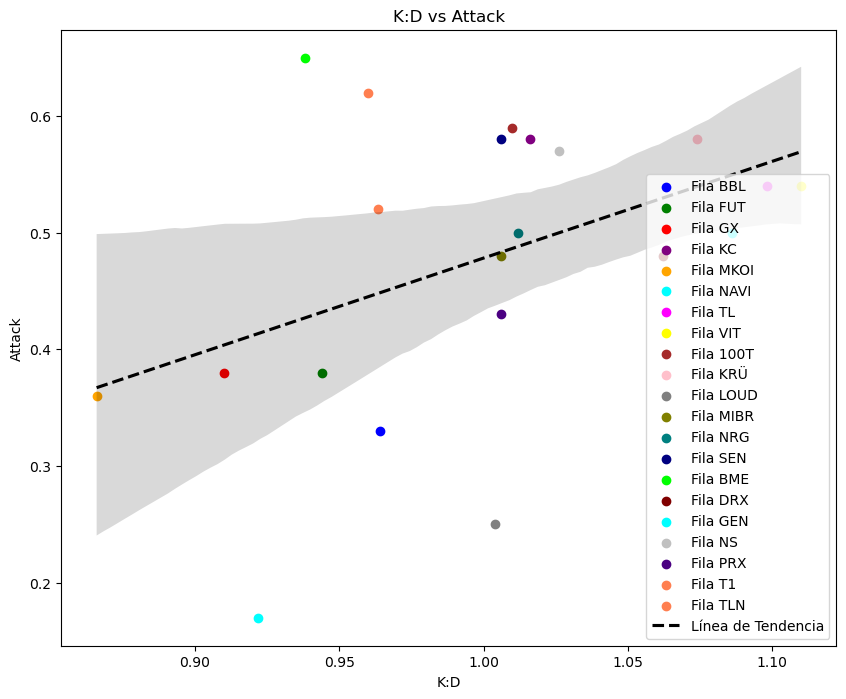

In [95]:

import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de colores para cada fila
colors = [
    'blue', 'green', 'red', 'purple', 'orange', 'cyan',
    'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive',
    'teal', 'navy', 'lime', 'maroon', 'aqua', 'silver',
    'indigo', 'coral','coral'
]

# Crear una sola gráfica
plt.figure(figsize=(10, 8))

# Recorrer fila por fila
for i, (index, row) in enumerate(stats_BIND_final.iterrows()):
    plt.scatter(row[stats_BIND_final.columns[2]], row[stats_BIND_final.columns[-1]], color=colors[i], label=f'Fila {index}')

# Agregar la línea de tendencia con seaborn
sns.regplot(x=stats_BIND_final[stats_BIND_final.columns[2]], 
            y=stats_BIND_final[stats_BIND_final.columns[-1]], 
            scatter=False,  # No graficar los puntos nuevamente
            color='black',  # Color de la línea de tendencia
            line_kws={'linestyle': '--'},  # Estilo de la línea
            label='Línea de Tendencia')

# Configurar la gráfica
plt.xlabel(stats_BIND_final.columns[2])  # Nombre de la primera columna
plt.ylabel(stats_BIND_final.columns[-1])  # Nombre de la última columna (target)
plt.title(f'{stats_BIND_final.columns[2]} vs {stats_BIND_final.columns[-1]}')
plt.legend()
plt.show()

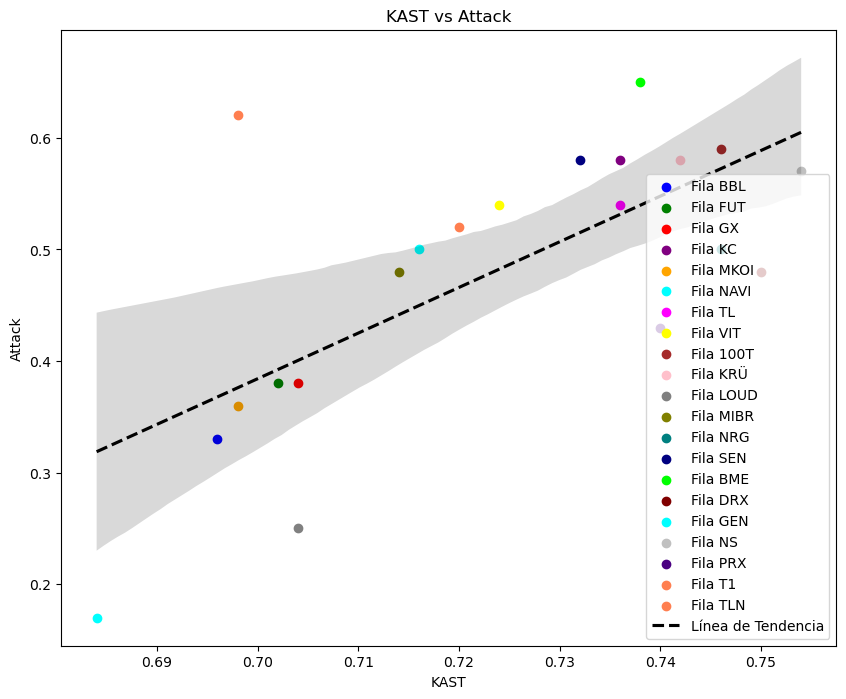

In [96]:
# Configuración de colores para cada fila
colors = [
    'blue', 'green', 'red', 'purple', 'orange', 'cyan',
    'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive',
    'teal', 'navy', 'lime', 'maroon', 'aqua', 'silver',
    'indigo', 'coral','coral'
]

# Crear una sola gráfica
plt.figure(figsize=(10, 8))

# Recorrer fila por fila
for i, (index, row) in enumerate(stats_BIND_final.iterrows()):
    plt.scatter(row[stats_BIND_final.columns[3]], row[stats_BIND_final.columns[-1]], color=colors[i], label=f'Fila {index}')

# Agregar la línea de tendencia con seaborn
sns.regplot(x=stats_BIND_final[stats_BIND_final.columns[3]], 
            y=stats_BIND_final[stats_BIND_final.columns[-1]], 
            scatter=False,  # No graficar los puntos nuevamente
            color='black',  # Color de la línea de tendencia
            line_kws={'linestyle': '--'},  # Estilo de la línea
            label='Línea de Tendencia')

# Configurar la gráfica
plt.xlabel(stats_BIND_final.columns[3])  # Nombre de la primera columna
plt.ylabel(stats_BIND_final.columns[-1])  # Nombre de la última columna (target)
plt.title(f'{stats_BIND_final.columns[3]} vs {stats_BIND_final.columns[-1]}')
plt.legend()
plt.show()

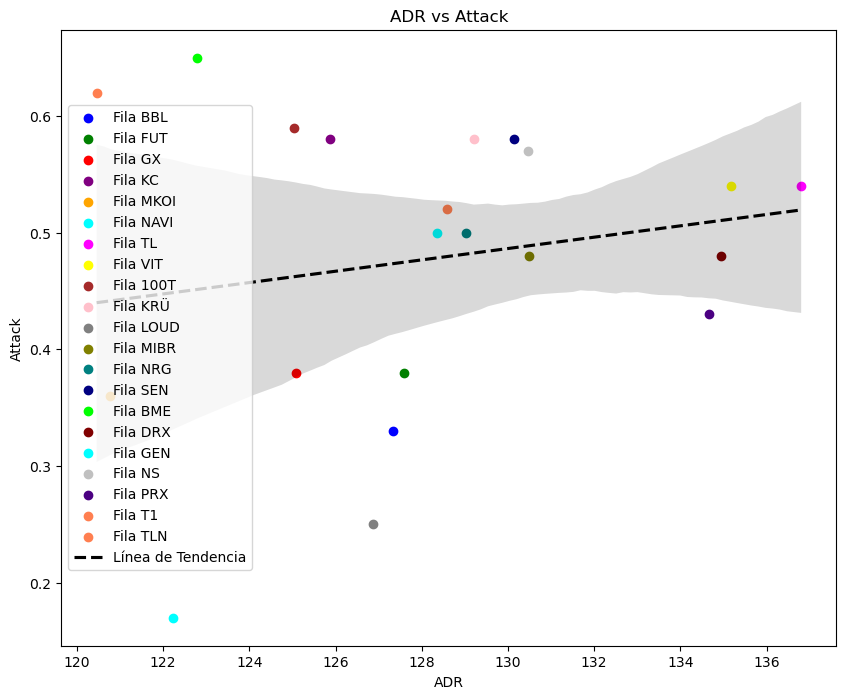

In [97]:
# Configuración de colores para cada fila
colors = [
    'blue', 'green', 'red', 'purple', 'orange', 'cyan',
    'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive',
    'teal', 'navy', 'lime', 'maroon', 'aqua', 'silver',
    'indigo', 'coral','coral'
]

# Crear una sola gráfica
plt.figure(figsize=(10, 8))

# Recorrer fila por fila
for i, (index, row) in enumerate(stats_BIND_final.iterrows()):
    plt.scatter(row[stats_BIND_final.columns[4]], row[stats_BIND_final.columns[-1]], color=colors[i], label=f'Fila {index}')

# Agregar la línea de tendencia con seaborn
sns.regplot(x=stats_BIND_final[stats_BIND_final.columns[4]], 
            y=stats_BIND_final[stats_BIND_final.columns[-1]], 
            scatter=False,  # No graficar los puntos nuevamente
            color='black',  # Color de la línea de tendencia
            line_kws={'linestyle': '--'},  # Estilo de la línea
            label='Línea de Tendencia')

# Configurar la gráfica
plt.xlabel(stats_BIND_final.columns[4])  # Nombre de la primera columna
plt.ylabel(stats_BIND_final.columns[-1])  # Nombre de la última columna (target)
plt.title(f'{stats_BIND_final.columns[4]} vs {stats_BIND_final.columns[-1]}')
plt.legend()
plt.show()

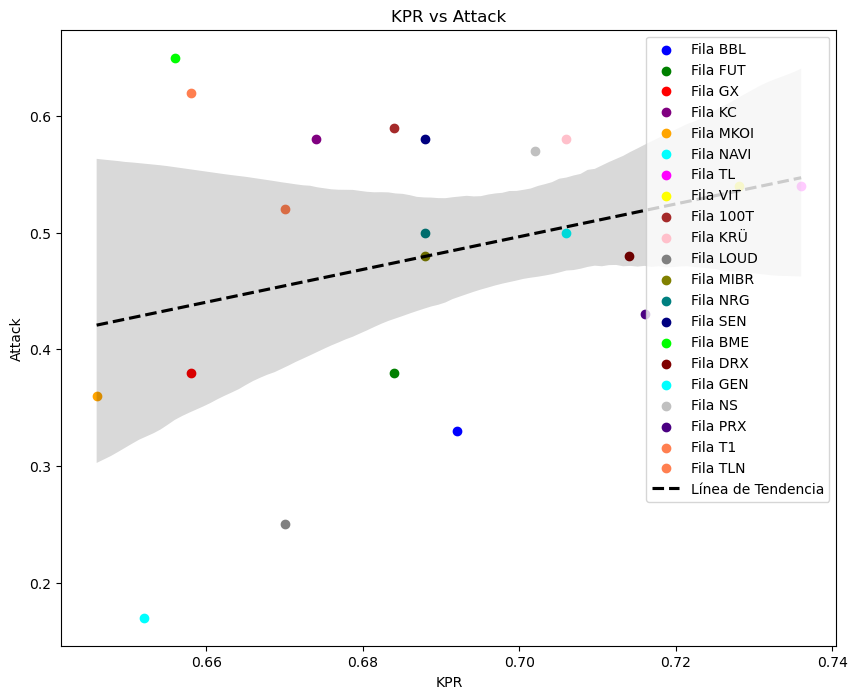

In [98]:
# Configuración de colores para cada fila
colors = [
    'blue', 'green', 'red', 'purple', 'orange', 'cyan',
    'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive',
    'teal', 'navy', 'lime', 'maroon', 'aqua', 'silver',
    'indigo', 'coral','coral'
]

# Crear una sola gráfica
plt.figure(figsize=(10, 8))

# Recorrer fila por fila
for i, (index, row) in enumerate(stats_BIND_final.iterrows()):
    plt.scatter(row[stats_BIND_final.columns[5]], row[stats_BIND_final.columns[-1]], color=colors[i], label=f'Fila {index}')

# Agregar la línea de tendencia con seaborn
sns.regplot(x=stats_BIND_final[stats_BIND_final.columns[5]], 
            y=stats_BIND_final[stats_BIND_final.columns[-1]], 
            scatter=False,  # No graficar los puntos nuevamente
            color='black',  # Color de la línea de tendencia
            line_kws={'linestyle': '--'},  # Estilo de la línea
            label='Línea de Tendencia')

# Configurar la gráfica
plt.xlabel(stats_BIND_final.columns[5])  # Nombre de la primera columna
plt.ylabel(stats_BIND_final.columns[-1])  # Nombre de la última columna (target)
plt.title(f'{stats_BIND_final.columns[5]} vs {stats_BIND_final.columns[-1]}')
plt.legend()
plt.show()

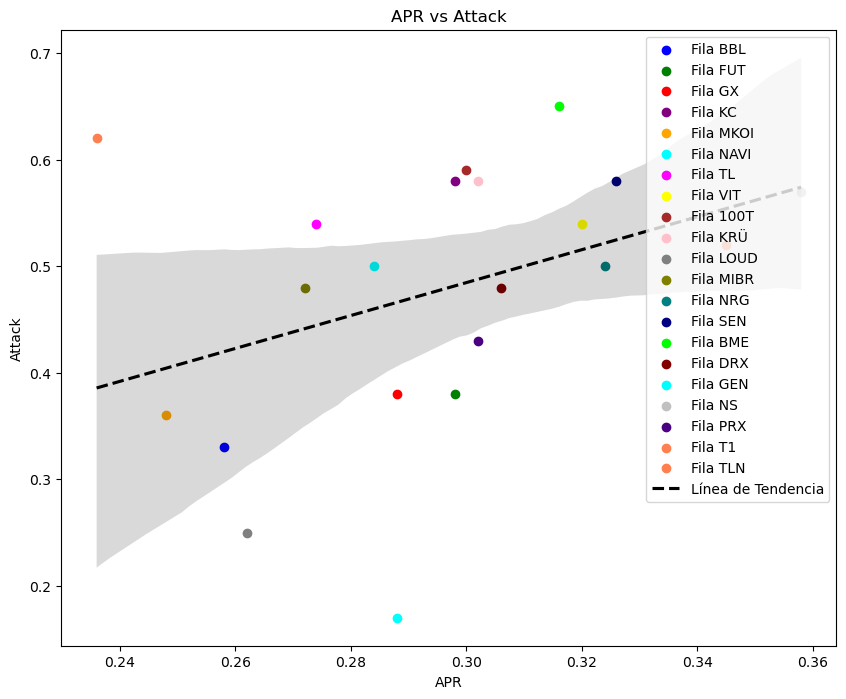

In [99]:
# Configuración de colores para cada fila
colors = [
    'blue', 'green', 'red', 'purple', 'orange', 'cyan',
    'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive',
    'teal', 'navy', 'lime', 'maroon', 'aqua', 'silver',
    'indigo', 'coral','coral'
]

# Crear una sola gráfica
plt.figure(figsize=(10, 8))

# Recorrer fila por fila
for i, (index, row) in enumerate(stats_BIND_final.iterrows()):
    plt.scatter(row[stats_BIND_final.columns[6]], row[stats_BIND_final.columns[-1]], color=colors[i], label=f'Fila {index}')

# Agregar la línea de tendencia con seaborn
sns.regplot(x=stats_BIND_final[stats_BIND_final.columns[6]], 
            y=stats_BIND_final[stats_BIND_final.columns[-1]], 
            scatter=False,  # No graficar los puntos nuevamente
            color='black',  # Color de la línea de tendencia
            line_kws={'linestyle': '--'},  # Estilo de la línea
            label='Línea de Tendencia')

# Configurar la gráfica
plt.xlabel(stats_BIND_final.columns[6])  # Nombre de la primera columna
plt.ylabel(stats_BIND_final.columns[-1])  # Nombre de la última columna (target)
plt.title(f'{stats_BIND_final.columns[6]} vs {stats_BIND_final.columns[-1]}')
plt.legend()
plt.show()

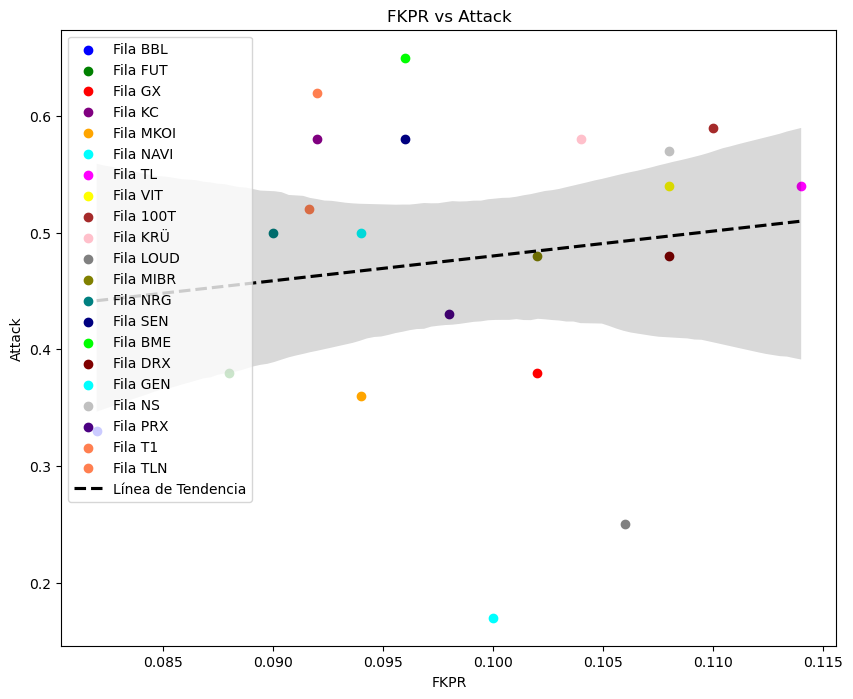

In [100]:
# Configuración de colores para cada fila
colors = [
    'blue', 'green', 'red', 'purple', 'orange', 'cyan',
    'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive',
    'teal', 'navy', 'lime', 'maroon', 'aqua', 'silver',
    'indigo', 'coral','coral'
]

# Crear una sola gráfica
plt.figure(figsize=(10, 8))

# Recorrer fila por fila
for i, (index, row) in enumerate(stats_BIND_final.iterrows()):
    plt.scatter(row[stats_BIND_final.columns[7]], row[stats_BIND_final.columns[-1]], color=colors[i], label=f'Fila {index}')

# Agregar la línea de tendencia con seaborn
sns.regplot(x=stats_BIND_final[stats_BIND_final.columns[7]], 
            y=stats_BIND_final[stats_BIND_final.columns[-1]], 
            scatter=False,  # No graficar los puntos nuevamente
            color='black',  # Color de la línea de tendencia
            line_kws={'linestyle': '--'},  # Estilo de la línea
            label='Línea de Tendencia')

# Configurar la gráfica
plt.xlabel(stats_BIND_final.columns[7])  # Nombre de la primera columna
plt.ylabel(stats_BIND_final.columns[-1])  # Nombre de la última columna (target)
plt.title(f'{stats_BIND_final.columns[7]} vs {stats_BIND_final.columns[-1]}')
plt.legend()
plt.show()

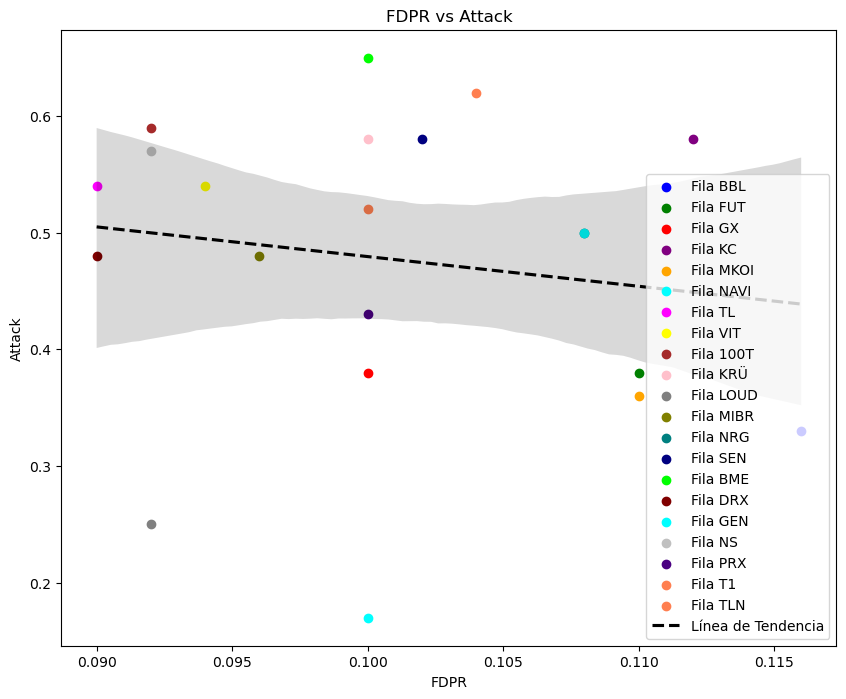

In [101]:
# Configuración de colores para cada fila
colors = [
    'blue', 'green', 'red', 'purple', 'orange', 'cyan',
    'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive',
    'teal', 'navy', 'lime', 'maroon', 'aqua', 'silver',
    'indigo', 'coral','coral'
]

# Crear una sola gráfica
plt.figure(figsize=(10, 8))

# Recorrer fila por fila
for i, (index, row) in enumerate(stats_BIND_final.iterrows()):
    plt.scatter(row[stats_BIND_final.columns[8]], row[stats_BIND_final.columns[-1]], color=colors[i], label=f'Fila {index}')

# Agregar la línea de tendencia con seaborn
sns.regplot(x=stats_BIND_final[stats_BIND_final.columns[8]], 
            y=stats_BIND_final[stats_BIND_final.columns[-1]], 
            scatter=False,  # No graficar los puntos nuevamente
            color='black',  # Color de la línea de tendencia
            line_kws={'linestyle': '--'},  # Estilo de la línea
            label='Línea de Tendencia')

# Configurar la gráfica
plt.xlabel(stats_BIND_final.columns[8])  # Nombre de la primera columna
plt.ylabel(stats_BIND_final.columns[-1])  # Nombre de la última columna (target)
plt.title(f'{stats_BIND_final.columns[8]} vs {stats_BIND_final.columns[-1]}')
plt.legend()
plt.show()

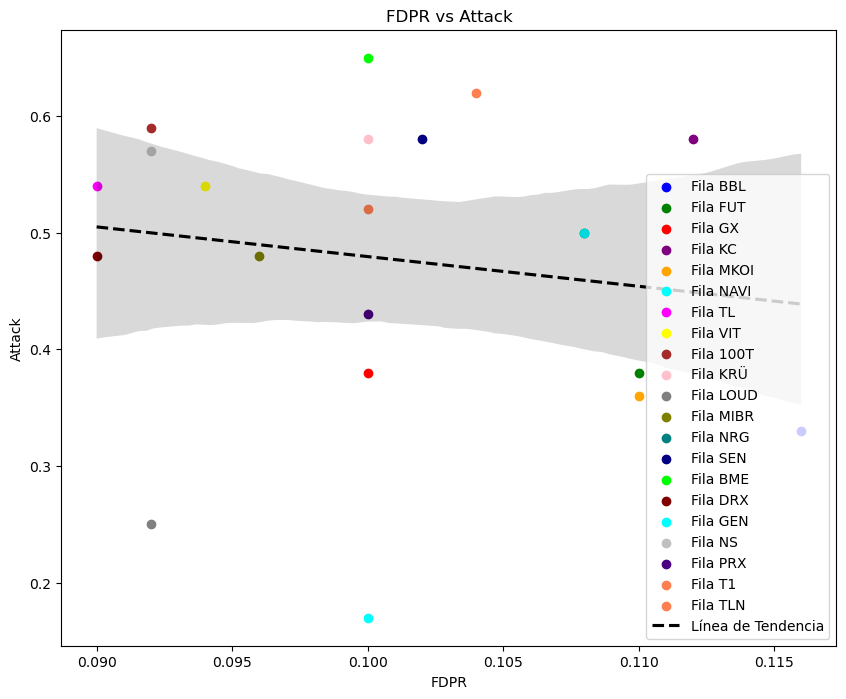

In [102]:

colors = [
    'blue', 'green', 'red', 'purple', 'orange', 'cyan',
    'magenta', 'yellow', 'brown', 'pink', 'gray', 'olive',
    'teal', 'navy', 'lime', 'maroon', 'aqua', 'silver',
    'indigo', 'coral','coral'
]

plt.figure(figsize=(10, 8))
for i, (index, row) in enumerate(stats_BIND_final.iterrows()):
    plt.scatter(row[stats_BIND_final.columns[8]], row[stats_BIND_final.columns[-1]], color=colors[i], label=f'Fila {index}')

sns.regplot(x=stats_BIND_final[stats_BIND_final.columns[8]], 
            y=stats_BIND_final[stats_BIND_final.columns[-1]], 
            scatter=False,  
            color='black',  
            line_kws={'linestyle': '--'},  
            label='Línea de Tendencia')

# Configurar la gráfica
plt.xlabel(stats_BIND_final.columns[8])  
plt.ylabel(stats_BIND_final.columns[-1])  
plt.title(f'{stats_BIND_final.columns[8]} vs {stats_BIND_final.columns[-1]}')
plt.legend()
plt.show()

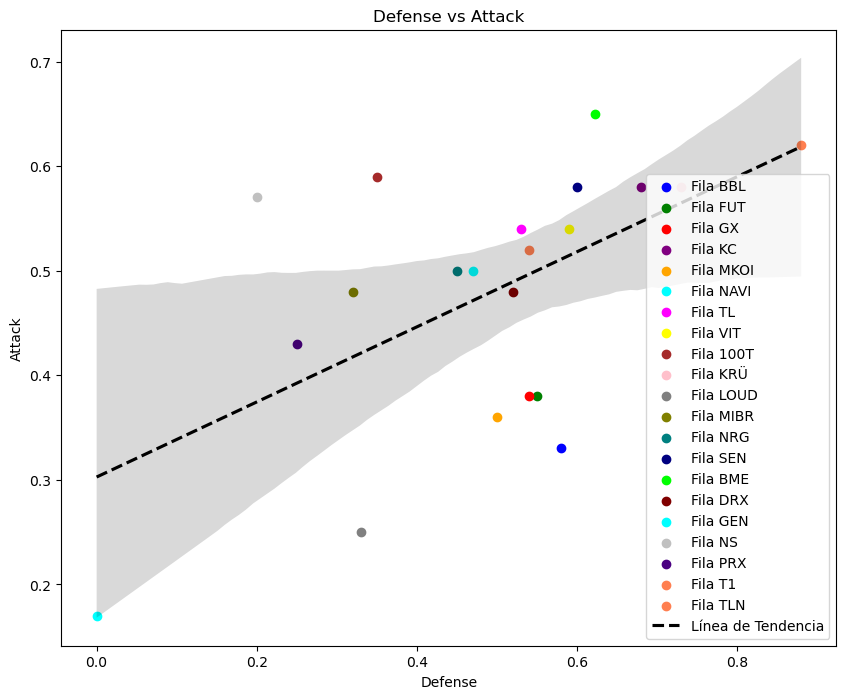

In [103]:

plt.figure(figsize=(10, 8))
for i, (index, row) in enumerate(stats_BIND_final.iterrows()):
    plt.scatter(row[stats_BIND_final.columns[9]], row[stats_BIND_final.columns[-1]], color=colors[i], label=f'Fila {index}')

sns.regplot(x=stats_BIND_final[stats_BIND_final.columns[9]], 
            y=stats_BIND_final[stats_BIND_final.columns[-1]], 
            scatter=False,  
            color='black',  
            line_kws={'linestyle': '--'},  
            label='Línea de Tendencia')

# Configurar la gráfica
plt.xlabel(stats_BIND_final.columns[9])  
plt.ylabel(stats_BIND_final.columns[-1])  
plt.title(f'{stats_BIND_final.columns[9]} vs {stats_BIND_final.columns[-1]}')
plt.legend()
plt.show()

In [104]:
X = stats_BIND_final.drop(['Defense', 'Attack'], axis=1)
y = stats_BIND_final['Defense']
y1 = stats_BIND_final['Attack']

X_train_attack_BIND, X_test_attack_BIND, y_train_attack_BIND, y_test_attack_BIND = train_test_split(X, y, test_size=0.2, random_state=4)
X_train_defense_BIND, X_test_defense_BIND, y_train_defense_BIND, y_test_defense_BIND = train_test_split(X, y1, test_size=0.2, random_state=4)

X_train_attack_BIND

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR
Team,,,,,,,,,
TLN,0.934,185.68,0.960,0.698,120.46,0.658,0.236,0.092,0.104
DRX,1.056,203.24,1.062,0.750,134.94,0.714,0.306,0.108,0.090
MKOI,0.882,180.98,0.866,0.698,120.78,0.646,0.248,0.094,0.110
GEN,1.038,199.32,1.086,0.716,128.36,0.706,0.284,0.094,0.108
SEN,1.028,197.86,1.006,0.732,130.14,0.688,0.326,0.096,0.102
MIBR,0.988,196.18,1.006,0.714,130.48,0.688,0.272,0.102,0.096
VIT,1.068,210.44,1.110,0.724,135.18,0.728,0.320,0.108,0.094
NRG,1.028,199.50,1.012,0.746,129.02,0.688,0.324,0.090,0.108
LOUD,0.994,191.22,1.004,0.704,126.86,0.670,0.262,0.106,0.092


In [105]:

model_attack_BIND = LinearRegression()
model_attack_BIND.fit(X_train_attack_BIND, y_train_attack_BIND)
predictions_attack = expit(model_attack_BIND.predict(X_test_attack_BIND))  # Transforma la salida a [0, 1]

model_attack_BIND.predict(X_test_attack_BIND)

model_defense_BIND = LinearRegression()
model_defense_BIND.fit(X_train_defense_BIND, y_train_defense_BIND)
predictions = expit(model_defense_BIND.predict(X_test_defense_BIND))  # Transforma la salida a [0, 1]

model_defense_BIND.predict(X_test_defense_BIND)

array([0.3614821 , 0.53737728, 0.46054205, 0.50312657, 0.47181778])

In [106]:
stats_BIND.head(36)

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Defense,Attack
Team,,,,,,,,,,,
APK,0.906667,182.400000,0.856667,0.700,123.883333,0.643333,0.273333,0.080000,0.118333,0.000,0.00
BBL,0.958000,194.800000,0.964000,0.696,127.340000,0.692000,0.258000,0.082000,0.116000,0.580,0.33
FNC,1.036000,199.900000,1.074000,0.714,133.040000,0.712000,0.296000,0.108000,0.094000,0.000,0.00
FUT,0.976000,195.360000,0.944000,0.702,127.580000,0.684000,0.298000,0.088000,0.110000,0.550,0.38
GX,0.948000,188.420000,0.910000,0.704,125.080000,0.658000,0.288000,0.102000,0.100000,0.540,0.38
KC,1.010000,192.240000,1.016000,0.736,125.880000,0.674000,0.298000,0.092000,0.112000,0.680,0.58
M8,1.024000,188.980000,1.018000,0.698,123.880000,0.672000,0.268000,0.106000,0.094000,0.000,0.00
MKOI,0.882000,180.980000,0.866000,0.698,120.780000,0.646000,0.248000,0.094000,0.110000,0.500,0.36
NAVI,0.916000,183.440000,0.922000,0.684,122.240000,0.652000,0.288000,0.100000,0.100000,0.000,0.17


In [107]:

Thieves = stats_BIND.iloc[32:33]  # Usamos 1:2 para mantener la estructura de DataFrame
# Eliminar las últimas dos columnas
Thieves = Thieves.iloc[:, :-2]

MIBR = stats_BIND.iloc[28:29]  # Usamos 1:2 para mantener la estructura de DataFrame
# Eliminar las últimas dos columnas
MIBR = MIBR.iloc[:, :-2]

x = model_attack_BIND.predict(Thieves)
y = model_defense_BIND.predict(Thieves)
x1 = model_attack_BIND.predict(MIBR)
y1 = model_defense_BIND.predict(MIBR)


print(x*12+y*12)
print(x1*12+y1*12)


[2.82542047]
[13.12885068]


In [108]:
Thieves

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR
Team,,,,,,,,,
T1,0.99,191.683333,0.963333,0.72,128.583333,0.67,0.345,0.091667,0.1


In [109]:
MIBR

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR
Team,,,,,,,,,
GEN,1.038,199.32,1.086,0.716,128.36,0.706,0.284,0.094,0.108


In [110]:
data_agentes_pac

,Map,#,ATK WIN,DEF WIN,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,63,52%,48%,51%,44%,40%,37%,32%,29%,...,9%,7%,7%,6%,5%,3%,2%,1%,0%,0%
1,L Lotus,13,49%,51%,77%,96%,12%,15%,81%,19%,...,0%,4%,0%,12%,4%,0%,8%,0%,0%,0%
2,B Bind,9,55%,45%,94%,0%,0%,17%,61%,0%,...,61%,0%,0%,0%,0%,0%,6%,0%,0%,0%
3,F Fracture,9,49%,51%,72%,0%,17%,0%,0%,28%,...,0%,6%,0%,0%,6%,0%,0%,0%,0%,0%
4,P Pearl,9,59%,41%,0%,0%,78%,100%,11%,0%,...,0%,6%,17%,6%,0%,22%,0%,0%,0%,0%
5,A Abyss,8,55%,45%,0%,63%,100%,75%,0%,44%,...,0%,0%,6%,0%,13%,0%,0%,0%,0%,0%
6,S Split,8,42%,58%,88%,44%,0%,56%,38%,69%,...,0%,38%,13%,0%,13%,0%,0%,6%,0%,0%
7,H Haven,7,57%,43%,0%,100%,100%,0%,0%,57%,...,0%,0%,21%,21%,0%,0%,0%,0%,0%,0%


In [111]:
data_agentes_emea
data_agentes_emea.set_index('Map', inplace=True)

In [112]:
data_agentes_americas
data_agentes_americas.set_index('Map', inplace=True)

In [113]:
data_agentes_pac
data_agentes_pac.set_index('Map', inplace=True)

In [114]:

#BIND
tabla_agentes_bind_emea = data_agentes_emea.iloc[[5]]
tabla_agentes_bind_emea.head(1)

tabla_agentes_bind_americas = data_agentes_americas.iloc[[5]]
tabla_agentes_bind_americas.head(1)

tabla_agentes_bind_pac = data_agentes_pac.iloc[[2]]
tabla_agentes_bind_pac.head(1)

#LOTUS
tabla_agentes_lotus_emea = data_agentes_emea.iloc[[6]]
tabla_agentes_lotus_emea.head(1)

tabla_agentes_lotus_americas = data_agentes_americas.iloc[[4]]
tabla_agentes_lotus_americas.head(1)

tabla_agentes_lotus_pac = data_agentes_pac.iloc[[1]]
tabla_agentes_lotus_pac.head(1)

#PEARL

tabla_agentes_pearl_emea = data_agentes_emea.iloc[[4]]
tabla_agentes_pearl_emea.head(1)

tabla_agentes_pearl_americas = data_agentes_americas.iloc[[2]]
tabla_agentes_pearl_americas.head(1)

tabla_agentes_pearl_pac = data_agentes_pac.iloc[[1]]
tabla_agentes_pearl_pac.head(1)

#Fracture

tabla_agentes_fracture_emea = data_agentes_emea.iloc[[2]]
tabla_agentes_fracture_emea.head(1)

tabla_agentes_fracture_americas = data_agentes_americas.iloc[[7]]
tabla_agentes_fracture_americas.head(1)

tabla_agentes_fracture_pac = data_agentes_pac.iloc[[3]]
tabla_agentes_fracture_pac.head(1)


#Abyss
tabla_agentes_abyss_emea = data_agentes_emea.iloc[[1]]
tabla_agentes_abyss_emea.head(1)

tabla_agentes_abyss_americas = data_agentes_americas.iloc[[3]]
tabla_agentes_abyss_americas.head(1)

tabla_agentes_abyss_pac = data_agentes_pac.iloc[[5]]
tabla_agentes_abyss_pac.head(1)

#Heaven

tabla_agentes_heaven_emea = data_agentes_emea.iloc[[3]]
tabla_agentes_heaven_emea.head(1)

tabla_agentes_heaven_americas = data_agentes_americas.iloc[[6]]
tabla_agentes_heaven_americas.head(1)

tabla_agentes_heaven_pac = data_agentes_pac.iloc[[7]]
tabla_agentes_heaven_pac.head(1)

#Split

tabla_agentes_split_emea = data_agentes_emea.iloc[[7]]
tabla_agentes_split_emea.head(1)

tabla_agentes_split_americas = data_agentes_americas.iloc[[1]]
tabla_agentes_split_americas.head(1)

tabla_agentes_split_pac = data_agentes_pac.iloc[[6]]
tabla_agentes_split_pac.head(1)

,#,ATK WIN,DEF WIN,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
Map,,,,,,,,,,,,,,,,,,,,,
S Split,8,42%,58%,88%,44%,0%,56%,38%,69%,31%,...,0%,38%,13%,0%,13%,0%,0%,6%,0%,0%


In [115]:
agentes_nombres = {
    "Unnamed: 4": "Astra",
    "Unnamed: 5": "Raze",
    "Unnamed: 6": "Sova",  # Puedes agregar más nombres específicos
    "Unnamed: 7": "Omen",
    "Unnamed: 8": "Cypher",
    "Unnamed: 9": "Breach",
    "Unnamed: 10": "Yoru",
    "Unnamed: 11": "Tejo",
    "Unnamed: 12": "Jett",
    "Unnamed: 13": "Fade",
    "Unnamed: 14": "Brim",
    "Unnamed: 15": "Kayo",
    "Unnamed: 16": "Vyse",
    "Unnamed: 17": "Viper",
    "Unnamed: 18": "Kj",
    "Unnamed: 19": "Gekko",
    "Unnamed: 20": "Skye",
    "Unnamed: 21": "Chamber",
    "Unnamed: 22": "Sage",
    "Unnamed: 23": "Harbor",
    "Unnamed: 24": "Iso",
    "Unnamed: 25": "Neon",
    "Unnamed: 26": "Deadlock",
    "Unnamed: 27": "Clove",
    "Unnamed: 28": "Reyna",
    "Unnamed: 29": "Phoenix",
    
}

# Renombrar las columnas específicas
tabla_agentes_bind_emea = tabla_agentes_bind_emea.rename(columns=agentes_nombres)
tabla_agentes_lotus_emea = tabla_agentes_lotus_emea.rename(columns=agentes_nombres)
tabla_agentes_fracture_emea = tabla_agentes_fracture_emea.rename(columns=agentes_nombres)
tabla_agentes_pearl_emea = tabla_agentes_pearl_emea.rename(columns=agentes_nombres)
tabla_agentes_split_emea = tabla_agentes_split_emea.rename(columns=agentes_nombres)
tabla_agentes_heaven_emea = tabla_agentes_heaven_emea.rename(columns=agentes_nombres)
tabla_agentes_abyss_emea = tabla_agentes_abyss_emea.rename(columns=agentes_nombres)

In [116]:
tabla_agentes_lotus_emea

,#,ATK WIN,DEF WIN,Astra,Raze,Sova,Omen,Cypher,Breach,Yoru,...,Skye,Chamber,Sage,Harbor,Iso,Neon,Deadlock,Clove,Reyna,Phoenix
Map,,,,,,,,,,,,,,,,,,,,,
L Lotus,7,56%,44%,21%,64%,0%,86%,29%,21%,29%,...,0%,0%,7%,14%,0%,0%,0%,14%,14%,0%


In [117]:
agentes_nombres_americas= {
    "Unnamed: 4": "Omen",
    "Unnamed: 5": "Raze",
    "Unnamed: 6": "Astra",  
    "Unnamed: 7": "Breach",
    "Unnamed: 8": "Sova",
    "Unnamed: 9": "Jett",
    "Unnamed: 10": "Viper",
    "Unnamed: 11": "Tejo",
    "Unnamed: 12": "Vyse",
    "Unnamed: 13": "Cypher",
    "Unnamed: 14": "Yoru",
    "Unnamed: 15": "Kayo",
    "Unnamed: 16": "Fade",
    "Unnamed: 17": "Brim",
    "Unnamed: 18": "Skye",
    "Unnamed: 19": "KJ",
    "Unnamed: 20": "Chamber",
    "Unnamed: 21": "Deadlock",
    "Unnamed: 22": "Gekko",
    "Unnamed: 23": "Clove",
    "Unnamed: 24": "Neon",
    "Unnamed: 25": "Sage",
    "Unnamed: 26": "Phoenix",
    "Unnamed: 27": "Iso",
    "Unnamed: 28": "Reyna",
    "Unnamed: 29": "Harbor",
    
}

# Renombrar las columnas específicas
tabla_agentes_bind_americas = tabla_agentes_bind_americas.rename(columns=agentes_nombres_americas)
tabla_agentes_lotus_americas = tabla_agentes_lotus_americas.rename(columns=agentes_nombres_americas)
tabla_agentes_fracture_americas = tabla_agentes_fracture_americas.rename(columns=agentes_nombres_americas)
tabla_agentes_pearl_americas = tabla_agentes_pearl_americas.rename(columns=agentes_nombres_americas)
tabla_agentes_split_americas = tabla_agentes_split_americas.rename(columns=agentes_nombres_americas)
tabla_agentes_heaven_americas = tabla_agentes_heaven_americas.rename(columns=agentes_nombres_americas)
tabla_agentes_abyss_americas = tabla_agentes_abyss_americas.rename(columns=agentes_nombres_americas)


In [118]:
agentes_nombres_pac= {
    "Unnamed: 4": "Raze",
    "Unnamed: 5": "Omen",
    "Unnamed: 6": "Sova",  
    "Unnamed: 7": "Astra",
    "Unnamed: 8": "Fade",
    "Unnamed: 9": "Cypher",
    "Unnamed: 10": "Breach",
    "Unnamed: 11": "Kj",
    "Unnamed: 12": "Brim",
    "Unnamed: 13": "Jett",
    "Unnamed: 14": "Vyse",
    "Unnamed: 15": "Tejo",
    "Unnamed: 16": "Neon",
    "Unnamed: 17": "Kayo",
    "Unnamed: 18": "Viper",
    "Unnamed: 19": "Deadlock",
    "Unnamed: 20": "Gekko",
    "Unnamed: 21": "Skye",
    "Unnamed: 22": "Yoru",
    "Unnamed: 23": "Iso",
    "Unnamed: 24": "Chamber",
    "Unnamed: 25": "Phoenix",
    "Unnamed: 26": "Clove",
    "Unnamed: 27": "Sage",
    "Unnamed: 28": "Reyna",
    "Unnamed: 29": "Harbor",
}

# Renombrar las columnas específicas
tabla_agentes_bind_pac = tabla_agentes_bind_pac.rename(columns=agentes_nombres_pac)
tabla_agentes_lotus_pac = tabla_agentes_lotus_pac.rename(columns=agentes_nombres_pac)
tabla_agentes_fracture_pac = tabla_agentes_fracture_pac.rename(columns=agentes_nombres_pac)
tabla_agentes_pearl_pac = tabla_agentes_pearl_pac.rename(columns=agentes_nombres_pac)
tabla_agentes_split_pac = tabla_agentes_split_pac.rename(columns=agentes_nombres_pac)
tabla_agentes_heaven_pac = tabla_agentes_heaven_pac.rename(columns=agentes_nombres_pac)
tabla_agentes_abyss_pac = tabla_agentes_abyss_pac.rename(columns=agentes_nombres_pac)


In [119]:
tabla_agentes_bind_pac

,#,ATK WIN,DEF WIN,Raze,Omen,Sova,Astra,Fade,Cypher,Breach,...,Gekko,Skye,Yoru,Iso,Chamber,Phoenix,Clove,Sage,Reyna,Harbor
Map,,,,,,,,,,,,,,,,,,,,,
B Bind,9,55%,45%,94%,0%,0%,17%,61%,0%,0%,...,61%,0%,0%,0%,0%,0%,6%,0%,0%,0%


In [120]:
tabla_agentes_bind_emea

,#,ATK WIN,DEF WIN,Astra,Raze,Sova,Omen,Cypher,Breach,Yoru,...,Skye,Chamber,Sage,Harbor,Iso,Neon,Deadlock,Clove,Reyna,Phoenix
Map,,,,,,,,,,,,,,,,,,,,,
B Bind,8,57%,43%,38%,81%,0%,6%,6%,0%,19%,...,44%,0%,6%,0%,0%,0%,19%,0%,0%,0%


In [121]:
Agentes_finales_bind = pd.concat([tabla_agentes_bind_pac, tabla_agentes_bind_americas, tabla_agentes_bind_emea], ignore_index=True)
Agentes_finales_pearl = pd.concat([tabla_agentes_pearl_pac, tabla_agentes_pearl_americas, tabla_agentes_pearl_emea], ignore_index=True)
Agentes_finales_fracture = pd.concat([tabla_agentes_fracture_pac, tabla_agentes_fracture_americas, tabla_agentes_fracture_emea], ignore_index=True)
Agentes_finales_split = pd.concat([tabla_agentes_split_pac, tabla_agentes_split_americas, tabla_agentes_split_emea], ignore_index=True)
Agentes_finales_lotus = pd.concat([tabla_agentes_lotus_pac, tabla_agentes_lotus_americas, tabla_agentes_lotus_emea], ignore_index=True)
Agentes_finales_heaven = pd.concat([tabla_agentes_heaven_pac, tabla_agentes_heaven_americas, tabla_agentes_heaven_emea], ignore_index=True)
Agentes_finales_abyss = pd.concat([tabla_agentes_abyss_pac, tabla_agentes_abyss_americas, tabla_agentes_abyss_emea], ignore_index=True)

In [122]:

def convertir_a_float(porcentaje):
    if isinstance(porcentaje, str) and porcentaje.endswith('%'):
        return float(porcentaje.strip('%')) / 100
    return porcentaje  


df_bind = Agentes_finales_bind.applymap(convertir_a_float)
promedios_bind = df_bind.mean()
df_promedios_bind = promedios_bind.to_frame().T
df_promedios_bind.head()

df_pearl = Agentes_finales_pearl.applymap(convertir_a_float)
promedios_pearl = df_pearl.mean()
df_promedios_pearl = promedios_pearl.to_frame().T
df_promedios_pearl.head()

df_fracture = Agentes_finales_fracture.applymap(convertir_a_float)
promedios_fracture = df_fracture.mean()
df_promedios_fracture = promedios_fracture.to_frame().T
df_promedios_fracture.head()

df_lotus = Agentes_finales_lotus.applymap(convertir_a_float)
promedios_lotus = df_lotus.mean()
df_promedios_lotus = promedios_lotus.to_frame().T
df_promedios_lotus.head()

df_split = Agentes_finales_split.applymap(convertir_a_float)
promedios_split = df_split.mean()
df_promedios_split = promedios_split.to_frame().T
df_promedios_split.head()

df_heaven = Agentes_finales_heaven.applymap(convertir_a_float)
promedios_heaven = df_heaven.mean()
df_promedios_heaven = promedios_heaven.to_frame().T
df_promedios_heaven.head()

df_abyss = Agentes_finales_abyss.applymap(convertir_a_float)
promedios_abyss = df_abyss.mean()
df_promedios_abyss = promedios_abyss.to_frame().T
df_promedios_abyss.head()




,#,ATK WIN,DEF WIN,Raze,Omen,Sova,Astra,Fade,Cypher,Breach,...,Skye,Yoru,Iso,Chamber,Phoenix,Clove,Sage,Reyna,Harbor,KJ
0,9.666667,0.58,0.42,0.0,0.496667,0.953333,0.823333,0.06,0.336667,0.19,...,0.0,0.286667,0.0,0.123333,0.0,0.0,0.016667,0.016667,0.03,0.0


In [123]:
df_promedios_bind.columns

Index(['#', 'ATK WIN', 'DEF WIN', 'Raze', 'Omen', 'Sova', 'Astra', 'Fade',
       'Cypher', 'Breach', 'Kj', 'Brim', 'Jett', 'Vyse', 'Tejo', 'Neon',
       'Kayo', 'Viper', 'Deadlock', 'Gekko', 'Skye', 'Yoru', 'Iso', 'Chamber',
       'Phoenix', 'Clove', 'Sage', 'Reyna', 'Harbor', 'KJ'],
      dtype='object')

In [124]:
stats_Fracture_final

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Defense,Attack
Team,,,,,,,,,,,
BBL,0.958,194.800000,0.964000,0.696,127.340000,0.692,0.258,0.082000,0.116,0.33,0.44
FNC,1.036,199.900000,1.074000,0.714,133.040000,0.712,0.296,0.108000,0.094,0.38,0.60
FUT,0.976,195.360000,0.944000,0.702,127.580000,0.684,0.298,0.088000,0.110,0.63,0.79
GX,0.948,188.420000,0.910000,0.704,125.080000,0.658,0.288,0.102000,0.100,0.57,0.39
KC,1.010,192.240000,1.016000,0.736,125.880000,0.674,0.298,0.092000,0.112,0.55,0.33
M8,1.024,188.980000,1.018000,0.698,123.880000,0.672,0.268,0.106000,0.094,0.11,0.44
MKOI,0.882,180.980000,0.866000,0.698,120.780000,0.646,0.248,0.094000,0.110,0.55,0.58
NAVI,0.916,183.440000,0.922000,0.684,122.240000,0.652,0.288,0.100000,0.100,0.50,0.78
TH,0.952,185.140000,0.906000,0.702,124.740000,0.650,0.328,0.100000,0.100,0.42,0.63


In [125]:
dataframe_agentes_equipo_bind =pd.DataFrame({
    'Team': [     "BBL"  , "FUT"  , "GX"  , "KC"     ,"MKOI"  , "NAVI","TL"   ,"VIT"  ,"100T" ,"KRÜ"  ,"LOUD"    ,"MIBR" ,"NRG"  ,"SEN"   ,"BME" ,"DRX"  ,"GEN"  ,"NS"   ,"PRX"     ,"T1"   ,"TLN"],
    'Agente_1': [ 'Astra','Cypher','Astra','Astra'   ,'Astra' ,'Brim' ,'Brim' ,'Brim' ,'Brim' ,'Brim' ,'Brim'    ,'Brim' ,'Brim' ,'Brim' ,'Brim','Brim' ,'Brim' ,'Brim' ,'Brim'    ,'Brim' ,'Astra'],
    'Agente_2': [ 'Raze' ,'Kayo'  ,'Fade' ,'Deadlock','Kayo'  ,'Gekko','Gekko','Raze' ,'Fade' ,'Raze' ,'Deadlock','Raze' ,'Fade' ,'Gekko','Fade','Kayo' ,'Fade' ,'Fade' ,'Clove'   ,'Gekko','Deadlock'],
    'Agente_3': [ 'Sage' ,'Omen'  ,'Gekko','Gekko'   ,'Raze'  ,'Kayo' ,'Raze' ,'Skye' ,'Gekko','Skye' ,'Kayo'    ,'Skye' ,'Kayo' ,'Raze' ,'Kayo','Raze' ,'Gekko','Neon' ,'Deadlock','Kayo' ,'Fade'],
    'Agente_4': [ 'Tejo' ,'Raze'  ,'Raze' ,'Vyse'    ,'Tejo'  ,'Raze' ,'Skye' ,'Tejo' ,'Raze' ,'Viper','Raze'    ,'Viper','Raze' , 'Tejo','Raze','Tejo' ,'Raze' ,'Viper','Fade'    ,'Raze' ,'Gekko'],
    'Agente_5': [ 'Vyse' ,'Viper' ,'Viper','Yoru'    ,'Viper' ,'Viper','Viper','Viper','Viper','Vyse' ,'Skye'    ,'Yoru' ,'Viper','Viper','Vyse','Viper','Viper','Vyse' ,'Raze'    ,'Vyse' ,'Raze']
})

dataframe_agentes_equipo_pearl =pd.DataFrame({
    'Team': [     "APK"    , "BBL"   , "FNC"  , "FUT"   ,"GX"   , "M8"  ,"MKOI" ,"NAVI"  ,"TH"    ,"TL"    ,"100T"  ,"C9"     ,"EG"      ,"G2"     ,"LEV"    ,"LOUD"   ,"MIBR"  ,"NRG"    ,"SEN"    ,"BME"   ,"DFM"  ,"DRX"  ,"GE"   ,"GEN"  ,"NS"   ,"RRQ"    ,"T1"   ,"TS"],
    'Agente_1': [ 'Astra'  ,'Astra'  ,'Astra' ,'Astra'  ,'Astra','Astra','Kj'   ,'Astra' ,'Astra' ,'Astra' ,'Astra' ,'Astra'  ,'Astra'   ,'Astra'  ,'Astra'  ,'Astra'  ,'Astra' ,'Astra'  ,'Astra'  ,'Astra' ,'Astra','Astra','Astra','Astra','Astra','Astra'  ,'Astra','Astra'],
    'Agente_2': [ 'Kj'     ,'Chamber','Kj'    ,'Cypher' ,'Jett' ,'Jett' ,'Omen' ,'Jett'  ,'Jett'  ,'Cypher','Fade'  ,'Cypher' ,'Jett'    ,'Chamber','Jett'   ,'Cypher' ,'Sova'  ,'Breach' ,'Tejo'   ,'Fade'  ,'Jett' ,'Jett' ,'Jett' ,'Jett' ,'Neon' ,'Jett'   ,'Kj'   ,'Jett'],
    'Agente_3': [ 'Phoenix','Sova'   ,'Sova'  ,'Fade'   ,'Kayo' ,'Kayo' ,'Tejo' ,'Kayo'  ,'Kayo'  ,'Jett'  ,'Jett'  ,'Fade'   ,'Phoenix' ,'Sova'   ,'Phoenix','Jett'   ,'Jett'  ,'Jett'   ,'Vyse'   ,'Kj'    ,'Kayo' ,'Kj'   ,'Kj'   ,'Kayo' ,'Sova' ,'Phoenix','Neon' ,'Kayo'],
    'Agente_4': [ 'Sova'   ,'Vyse'   ,'Tejo'  ,'Tejo'   ,'Kj'   ,'Kj'   ,'Vyse' ,'Kj'    ,'Kj'    ,'Kayo'  ,'Kayo'  ,'Tejo'   ,'Sova'    ,'Vyse'   ,'Sova'   ,'Kayo'   ,'Kayo'  ,'Tejo'   ,'Yoru'   ,'Neon'  ,'Kj'   ,'Tejo' ,'Sova' ,'Kj'   ,'Tejo' ,'Sova'   ,'Sova' ,'Kj'],
    'Agente_5': [ 'Yoru'   ,'Yoru'   ,'Yoru'  ,'Yoru'   ,'Sova' ,'Sova' ,'Yoru' ,'Sova'  ,'Tejo'  ,'Sova'  ,'Vyse'  ,'Yoru'   ,'Vyse'    ,'Yoru'   ,'Vyse'   ,'Sova'   ,'Kj'    ,'Vyse'   ,'Fade'   ,'Kayo'  ,'Tejo' ,'Sova' ,'Vyse' ,'Sova' ,'Vyse' ,'Vyse'   ,'Yoru' ,'Sova']                                                                                        
})

dataframe_agentes_equipo_fracture =pd.DataFrame({
    'Team': [     "BBL"    , "FNC"   , "FUT"  , "GX"   ,"KC"     , "M8"   ,"MKOI" ,"NAVI"  ,"TH"    ,"TL"    ,"VIT"   ,"C9"    ,"EG"    ,"FUR"     ,"G2"     ,"LEV"   ,"NRG"   ,"SEN"    ,"BME"    ,"DRX"   ,"GEN"   ,"NS"    ,"PRX"   ,"RRQ"   ,"T1"     ,"TLN"     ,"ZETA"   ],
    'Agente_1': [ 'Astra'  ,'Breach' ,'Astra' ,'Breach','Astra'  ,'Breach','Brim' ,'Breach','Astra' ,'Breach','Breach','Brim'  ,'Breach','Breach'  ,'Breach' ,'Breach','Breach','Breach' ,'Breach' ,'Breach','Breach','Breach','Breach','Breach','Breach' ,'Breach'  ,'Breach'],
    'Agente_2': [ 'Breach' ,'Brim'   ,'Breach','Brim'  ,'Breach' ,'Brim'  ,'Kj'   ,'Brim'  ,'Cypher','Brim'  ,'Brim'  ,'Clove' ,'Brim'  ,'Brim'    ,'Brim'   ,'Brim'  ,'Brim'  ,'Brim'   ,'Brim'   ,'Brim'  ,'Brim'  ,'Brim'  ,'Brim'  ,'Brim'  ,'Brim'   ,'Brim'    ,'Brim'   ],
    'Agente_3': [ 'Cypher' ,'Chamber','Cypher','Fade'  ,'Cypher' ,'Cypher','Tejo' ,'Cypher','Raze'  ,'Cypher','Raze'  ,'Kj'    ,'Kj'    ,'Cypher'  ,'Raze'   ,'Kj'    ,'Kj'    ,'Tejo'   ,'Cypher' ,'Raze'  ,'Kj'    ,'Cypher','Kj'    ,'Kj'    ,'Cypher' ,'Deadlock','Chamber' ],
    'Agente_4': [ 'Raze'   ,'Raze'   ,'Kayo'  ,'Kj'    ,'Tejo'   ,'Fade'  ,'Vyse' ,'Fade'  ,'Skye'  ,'Raze'  ,'Tejo'  ,'Raze'  ,'Raze'  ,'Raze'    ,'Tejo'   ,'Raze'  ,'Raze'  ,'Vyse'   ,'Neon'   ,'Tejo'  ,'Raze'  ,'Raze'  ,'Raze'  ,'Neon'  ,'Raze'   ,'Raze'    ,'Neon' ],
    'Agente_5': [ 'Yoru'   ,'Sova'   ,'Neon'  ,'Raze'  ,'Yoru'   ,'Raze'  ,'Yoru' ,'Raze'  ,'Tejo'  ,'Tejo'  ,'Vyse'  ,'Tejo'  ,'Tejo'  ,'Sage'    ,'Vyse'   ,'Tejo'  ,'Sova'  ,'Yoru'   ,'Tejo'   ,'Vyse'  ,'Sova'  ,'Tejo'  ,'Skye'  ,'Sova'  ,'Tejo'   ,'Tejo'    ,'Tejo' ]                                                                                        
})  

dataframe_agentes_equipo_lotus =pd.DataFrame({
    'Team': [     "BBL"    , "GX"   , "KC"   , "M8"   ,"MKOI"   , "NAVI" ,"TH"   ,"TL"    ,"VIT"  ,"100T"   ,"2G"   ,"C9"       ,"FUR"   ,"G2"     ,"LEV"  ,"LOUD"   ,"MIBR"  ,"NRG"    ,"SEN"  ,"BME"  ,"DFM"   ,"DRX"  ,"GE"      ,"GEN"  ,"NS"    ,"PRX" ,"RRQ"  ,"T1"    ,"TLN"     ,"TS"   ,"ZETA"],
    'Agente_1': [ 'Breach' ,'Fade'  ,'Fade'  ,'Breach','Cypher' ,'Astra' ,'Astra','Astra' ,'Fade' ,'Breach' ,'Breach','Breach'  ,'Breach','Breach' ,'Fade' ,'Breach' ,'Breach','Breach' ,'Fade' ,'Fade' ,'Astra' ,'Fade' ,'Astra'   ,'Fade' ,'Astra' ,'Jett','Fade' ,'Cypher','Deadlock','Fade' ,'Breach'],
    'Agente_2': [ 'Cypher' ,'Omen'  ,'Harbor','Cypher','Omen'   ,'Omen'  ,'Fade' ,'Fade'  ,'Omen' ,'Clove'  ,'Omen'  ,'Deadlock','Omen'  ,'Omen'   ,'Kj'   ,'Cypher' ,'Cypher','Omen'   ,'Omen' ,'Kj'   ,'Fade'  ,'Omen' ,'Chamber' ,'Kj'   ,'Fade'  ,'Omen','Omen' ,'Iso'   ,'Fade'    ,'Omen' ,'Cypher'],
    'Agente_3': [ 'Fade'   ,'Raze'  ,'Omen'  ,'Omen'  ,'Tejo'   ,'Sage'  ,'Kj'   ,'Kj'    ,'Raze' ,'Fade'   ,'Raze'  ,'Omen'    ,'Vyse'  ,'Tejo'   ,'Omen' ,'Fade'   ,'Jett'  ,'Raze'   ,'Raze' ,'Omen' ,'Omen'  ,'Raze' ,'Deadlock','Omen' ,'Neon'  ,'Raze','Raze' ,'Omen'  ,'Omen'    ,'Raze' ,'Fade'],
    'Agente_4': [ 'Omen'   ,'Viper' ,'Vyse'  ,'Tejo'  ,'Vyse'   ,'Tejo'  ,'Omen' ,'Omen'  ,'Viper','Omen'   ,'Tejo'  ,'Raze'    ,'Raze'  ,'Vyse'   ,'Raze' ,'Raze'   ,'Raze'  ,'Tejo'   ,'Viper','Raze' ,'Raze'  ,'Tejo' ,'Tejo'    ,'Raze' ,'Omen'  ,'Skye','Viper','Raze'  ,'Raze'    ,'Viper','Neon'],
    'Agente_5': [ 'Raze'   ,'Vyse'  ,'Yoru'  ,'Yoru'  ,'Yoru'   ,'Vyse'  ,'Raze' ,'Raze'  ,'Vyse' ,'Neon'   ,'Vyse'  ,'Tejo'    ,'Tejo'  ,'Yoru'   ,'Viper','Omen'   ,'Omen'  ,'Vyse'   ,'Vyse' ,'Viper','Vyse'  ,'Viper','Vyse'    ,'Viper','Vyse'  ,'Vyse','Vyse' ,'Sova'  ,'Tejo'    ,'Vyse' ,'Omen']                                                                                        
})


dataframe_agentes_equipo_heaven =pd.DataFrame({
    'Team': [     "APK"    , "BBL"   , "FNC"   , "FUT"  ,"KC"    , "M8"   ,"MKOI"  ,"NAVI"  ,"TH"    ,"TL"     ,"VIT"    ,"2G"    ,"C9"    ,"EG"    ,"FUR"   ,"G2"     ,"KRÜ"    ,"MIBR"   ,"NRG"    ,"SEN"    ,"DFM"   ,"GE"     ,"GEN"    ,"PRX"    ,"RRQ"   ,"T1"    ,"TLN"     ,"TS"],
    'Agente_1': [ 'Astra'  ,'Astra'  ,'Astra'  ,'Astra' ,'Astra' ,'Astra' ,'Astra' ,'Astra' ,'Astra'  ,'Cypher' ,'Astra'  ,'Astra' ,'Astra' ,'Astra' ,'Cypher','Astra'  ,'Astra'  ,'Astra'  ,'Harbor' ,'Astra'  ,'Astra' ,'Astra'  ,'Cypher' ,'Cypher' ,'Astra' ,'Astra' ,'Astra'   ,'Cypher'],
    'Agente_2': [ 'Cypher' ,'Breach' ,'Breach' ,'Fade'  ,'Fade'  ,'Jett'  ,'Cypher','Jett'  ,'Chamber','Jett'   ,'Breach' ,'Jett'  ,'Jett'  ,'Jett'  ,'Jett'  ,'Breach' ,'Jett'   ,'Cypher' ,'Omen'   ,'Jett'   ,'Jett'  ,'Breach' ,'Jett'   ,'Jett'   ,'Jett'  ,'Breach','Deadlock','Jett'],
    'Agente_3': [ 'Jett'   ,'Sage'   ,'Jett'   ,'Sova'  ,'Harbor','Yoru'  ,'Jett'  ,'Kayo'  ,'Sova'   ,'Kayo'   ,'Jett'   ,'Omen'  ,'Kayo'  ,'Omen'  ,'Kayo'  ,'Chamber','Kayo'   ,'Jett'   ,'Sova'   ,'Kayo'   ,'Kayo'  ,'Chamber','Kayo'   ,'Kayo'   ,'Kayo'  ,'Cypher','Neon'    ,'Kayo'],
    'Agente_4': [ 'Kayo'   ,'Sova'   ,'Sova'   ,'Vyse'  ,'Vyse'  ,'Omen'  ,'Kayo'  ,'Omen'  ,'Tejo'   ,'Omen'   ,'Omen'   ,'Sova'  ,'Omen'  ,'Sova'  ,'Omen'  ,'Sova'   ,'Sova'   ,'Kayo'   ,'Vyse'   ,'Omen'   ,'Omen'  ,'Jett'   ,'Omen'   ,'Omen'   ,'Omen'  ,'Sova'  ,'Sova'    ,'Omen'],
    'Agente_5': [ 'Sova'   ,'Yoru'   ,'Yoru'   ,'Yoru'  ,'Yoru'  ,'Sova'  ,'Sova'  ,'Sova'  ,'Yoru'   ,'Sova'   ,'Tejo'   ,'Yoru'  ,'Sova'  ,'Vyse'  ,'Sova'  ,'Yoru'   ,'Viper'  ,'Sova'   ,'Yoru'   ,'Tejo'   ,'Sova'  ,'Sova'   ,'Sova'   ,'Sova'   ,'Sova'  , 'Yoru' ,'Viper'   ,'Sova']                                                                                        
})

dataframe_agentes_equipo_split =pd.DataFrame({
    'Team': [     "BBL"   , "FNC"   , "FUT"   , "GX"  ,"TL"   , "VIT"  ,"100T"  ,"EG"      ,"FUR"  ,"G2"     ,"KRÜ"   ,"LEV"    ,"LOUD"  ,"MIBR"  ,"SEN"   ,"DFM"   ,"DRX"   ,"GE"      ,"GEN"    ,"NS"    ,"PRX"  ,"T1"      ,"TLN"     ,"TS"      ,"ZETA"  ],
    'Agente_1': [ 'Astra' ,'Breach' ,'Astra'  ,'Omen' ,'Astra','Breach','Astra' ,'Chamber' ,'Omen' ,'Astra'  ,'Cypher','Cypher' ,'Astra' ,'Astra' ,'Breach','Cypher','Breach','Astra'   ,'Astra'  ,'Astra' ,'Jett' ,'Chamber' ,'Astra'   ,'Astra'   ,'Breach' ],
    'Agente_2': [ 'Fade'  ,'Cypher' ,'Breach' ,'Raze' ,'Fade' ,'Fade'  ,'Breach','Omen'    ,'Raze' ,'Breach' ,'Omen'  ,'Omen'   ,'Breach','Jett'  ,'Omen'  ,'Omen'  ,'Cypher','Cypher'  ,'Breach' ,'Breach','Omen' ,'Omen'    ,'Cypher'  ,'Cypher'  ,'Cypher' ],
    'Agente_3': [ 'Omen'  ,'Omen'   ,'Cypher' ,'Skye' ,'Raze' ,'Omen'  ,'Raze'  ,'Raze'    ,'Sage' ,'Tejo'   ,'Raze'  ,'Raze'   ,'Cypher','Raze'  ,'Tejo'  ,'Raze'  ,'Omen'  ,'Deadlock','Cypher' ,'Cypher','Raze' ,'Raze'    ,'Deadlock','Deadlock','Fade' ],
    'Agente_4': [ 'Yoru'  ,'Raze'   ,'Fade'   ,'Viper','Viper','Viper' ,'Sage'  ,'Skye'    ,'Skye' ,'Vyse'   ,'Skye'  ,'Skye'   ,'Raze'  ,'Skye'  ,'Viper' ,'Skye'  ,'Raze'  ,'Fade'    ,'Raze'   ,'Neon'  ,'Sage' ,'Skye'    ,'Raze'    ,'Raze'    ,'Omen' ],
    'Agente_5': [ 'Raze'  ,'Yoru'   ,'Raze'   ,'Vyse' ,'Yoru' ,'Tejo'  ,'Tejo'  ,'Viper'   ,'Vyse' ,'Yoru'   ,'Viper' ,'Viper'  ,'Skye'  ,'Viper' ,'Yoru'  ,'Vyse'  ,'Tejo'  ,'Raze'    ,'Tejo'   ,'Tejo'  ,'Skye' ,'Viper'   ,'Skye'    ,'Skye'    ,'Raze']                                                                                        
})

dataframe_agentes_equipo_abyss =pd.DataFrame({
    'Team': [     "APK"    , "BBL"   , "FNC"   , "FUT"  ,"KC"    , "M8"   ,"MKOI"  ,"NAVI"  ,"TH"    ,"TL"     ,"VIT"    ,"2G"    ,"C9"    ,"EG"    ,"FUR"   ,"G2"     ,"KRÜ"    ,"MIBR"   ,"NRG"    ,"SEN"    ,"DFM"   ,"GE"     ,"GEN"    ,"PRX"    ,"RRQ"   ,"T1"    ,"TLN"     ,"TS"],
    'Agente_1': [ 'Astra'  ,'Astra'  ,'Astra'  ,'Astra' ,'Astra' ,'Astra' ,'Astra' ,'Astra' ,'Astra'  ,'Cypher' ,'Astra'  ,'Astra' ,'Astra' ,'Astra' ,'Cypher','Astra'  ,'Astra'  ,'Astra'  ,'Harbor' ,'Astra'  ,'Astra' ,'Astra'  ,'Cypher' ,'Cypher' ,'Astra' ,'Astra' ,'Astra'   ,'Cypher'],
    'Agente_2': [ 'Cypher' ,'Breach' ,'Breach' ,'Fade'  ,'Fade'  ,'Jett'  ,'Cypher','Jett'  ,'Chamber','Jett'   ,'Breach' ,'Jett'  ,'Jett'  ,'Jett'  ,'Jett'  ,'Breach' ,'Jett'   ,'Cypher' ,'Omen'   ,'Jett'   ,'Jett'  ,'Breach' ,'Jett'   ,'Jett'   ,'Jett'  ,'Breach','Deadlock','Jett'],
    'Agente_3': [ 'Jett'   ,'Sage'   ,'Jett'   ,'Sova'  ,'Harbor','Yoru'  ,'Jett'  ,'Kayo'  ,'Sova'   ,'Kayo'   ,'Jett'   ,'Omen'  ,'Kayo'  ,'Omen'  ,'Kayo'  ,'Chamber','Kayo'   ,'Jett'   ,'Sova'   ,'Kayo'   ,'Kayo'  ,'Chamber','Kayo'   ,'Kayo'   ,'Kayo'  ,'Cypher','Neon'    ,'Kayo'],
    'Agente_4': [ 'Kayo'   ,'Sova'   ,'Sova'   ,'Vyse'  ,'Vyse'  ,'Omen'  ,'Kayo'  ,'Omen'  ,'Tejo'   ,'Omen'   ,'Omen'   ,'Sova'  ,'Omen'  ,'Sova'  ,'Omen'  ,'Sova'   ,'Sova'   ,'Kayo'   ,'Vyse'   ,'Omen'   ,'Omen'  ,'Jett'   ,'Omen'   ,'Omen'   ,'Omen'  ,'Sova'  ,'Sova'    ,'Omen'],
    'Agente_5': [ 'Sova'   ,'Yoru'   ,'Yoru'   ,'Yoru'  ,'Yoru'  ,'Sova'  ,'Sova'  ,'Sova'  ,'Yoru'   ,'Sova'   ,'Tejo'   ,'Yoru'  ,'Sova'  ,'Vyse'  ,'Sova'  ,'Yoru'   ,'Viper'  ,'Sova'   ,'Yoru'   ,'Tejo'   ,'Sova'  ,'Sova'   ,'Sova'   ,'Sova'   ,'Sova'  , 'Yoru' ,'Viper'   ,'Sova']                                                                                        
})

In [126]:
stats_Lotus_final

,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Defense,Attack
Team,,,,,,,,,,,
BBL,0.958,194.800000,0.964000,0.696,127.340000,0.692,0.258,0.082000,0.116,0.56,0.42
GX,0.948,188.420000,0.910000,0.704,125.080000,0.658,0.288,0.102000,0.100,0.57,0.45
KC,1.010,192.240000,1.016000,0.736,125.880000,0.674,0.298,0.092000,0.112,0.50,0.56
M8,1.024,188.980000,1.018000,0.698,123.880000,0.672,0.268,0.106000,0.094,0.50,0.25
MKOI,0.882,180.980000,0.866000,0.698,120.780000,0.646,0.248,0.094000,0.110,0.75,0.50
NAVI,0.916,183.440000,0.922000,0.684,122.240000,0.652,0.288,0.100000,0.100,0.14,0.42
TH,0.952,185.140000,0.906000,0.702,124.740000,0.650,0.328,0.100000,0.100,0.46,0.46
TL,1.056,206.960000,1.098000,0.736,136.800000,0.736,0.274,0.114000,0.090,0.67,0.46
VIT,1.068,210.440000,1.110000,0.724,135.180000,0.728,0.320,0.108000,0.094,0.83,0.43


In [127]:

df_agentes_bind = df_promedios_bind
df_jugadores_bind = dataframe_agentes_equipo_bind

winrates_bind = df_agentes_bind.iloc[0]

resultados_bind = []

for index, row in df_jugadores_bind.iterrows():
    equipo = row['Team']
    
    agentes_equipo = [row['Agente_1'], row['Agente_2'], row['Agente_3'], row['Agente_4'], row['Agente_5']]
    valor_total = 0
    for agente in agentes_equipo:
        if agente in winrates_bind.index:  
            valor_total += winrates_bind[agente] 
    
    resultados_bind.append({'Team': equipo, 'Valor Total': valor_total})
df_resultados_bind = pd.DataFrame(resultados_bind)
#####################################################

df_agentes_pearl = df_promedios_pearl
df_jugadores_pearl = dataframe_agentes_equipo_pearl

winrates_pearl = df_agentes_pearl.iloc[0]

resultados_pearl = []

for index, row in df_jugadores_pearl.iterrows():
    equipo = row['Team']
    
    agentes_equipo = [row['Agente_1'], row['Agente_2'], row['Agente_3'], row['Agente_4'], row['Agente_5']]
    valor_total = 0
    for agente in agentes_equipo:
        if agente in winrates_pearl.index:  
            valor_total += winrates_pearl[agente] 
    
    resultados_pearl.append({'Team': equipo, 'Valor Total': valor_total})
df_resultados_pearl = pd.DataFrame(resultados_pearl)
########################################################

df_agentes_fracture = df_promedios_fracture
df_jugadores_fracture = dataframe_agentes_equipo_fracture

winrates_fracture = df_agentes_fracture.iloc[0]

resultados_fracture = []

for index, row in df_jugadores_fracture.iterrows():
    equipo = row['Team']
    
    agentes_equipo = [row['Agente_1'], row['Agente_2'], row['Agente_3'], row['Agente_4'], row['Agente_5']]
    valor_total = 0
    for agente in agentes_equipo:
        if agente in winrates_fracture.index:  
            valor_total += winrates_fracture[agente] 
    
    resultados_fracture.append({'Team': equipo, 'Valor Total': valor_total})
df_resultados_fracture = pd.DataFrame(resultados_fracture)
########################################################

df_agentes_lotus = df_promedios_lotus
df_jugadores_lotus = dataframe_agentes_equipo_lotus

winrates_lotus = df_agentes_lotus.iloc[0]

resultados_lotus = []

for index, row in df_jugadores_lotus.iterrows():
    equipo = row['Team']
    
    agentes_equipo = [row['Agente_1'], row['Agente_2'], row['Agente_3'], row['Agente_4'], row['Agente_5']]
    valor_total = 0
    for agente in agentes_equipo:
        if agente in winrates_lotus.index:  
            valor_total += winrates_lotus[agente] 
    
    resultados_lotus.append({'Team': equipo, 'Valor Total': valor_total})
df_resultados_lotus = pd.DataFrame(resultados_lotus)
########################################################

df_agentes_split = df_promedios_split
df_jugadores_split = dataframe_agentes_equipo_split

winrates_split = df_agentes_split.iloc[0]

resultados_split = []

for index, row in df_jugadores_split.iterrows():
    equipo = row['Team']
    
    agentes_equipo = [row['Agente_1'], row['Agente_2'], row['Agente_3'], row['Agente_4'], row['Agente_5']]
    valor_total = 0
    for agente in agentes_equipo:
        if agente in winrates_split.index:  
            valor_total += winrates_split[agente] 
    
    resultados_split.append({'Team': equipo, 'Valor Total': valor_total})
df_resultados_split = pd.DataFrame(resultados_split)
########################################################

df_agentes_abyss = df_promedios_abyss
df_jugadores_abyss = dataframe_agentes_equipo_abyss

winrates_abyss = df_agentes_abyss.iloc[0]

resultados_abyss = []

for index, row in df_jugadores_abyss.iterrows():
    equipo = row['Team']
    
    agentes_equipo = [row['Agente_1'], row['Agente_2'], row['Agente_3'], row['Agente_4'], row['Agente_5']]
    valor_total = 0
    for agente in agentes_equipo:
        if agente in winrates_abyss.index:  
            valor_total += winrates_abyss[agente] 
    
    resultados_abyss.append({'Team': equipo, 'Valor Total': valor_total})
df_resultados_abyss = pd.DataFrame(resultados_abyss)
########################################################

df_agentes_heaven = df_promedios_heaven
df_jugadores_heaven = dataframe_agentes_equipo_heaven

winrates_heaven = df_agentes_heaven.iloc[0]

resultados_heaven = []

for index, row in df_jugadores_heaven.iterrows():
    equipo = row['Team']
    
    agentes_equipo = [row['Agente_1'], row['Agente_2'], row['Agente_3'], row['Agente_4'], row['Agente_5']]
    valor_total = 0
    for agente in agentes_equipo:
        if agente in winrates_heaven.index:  
            valor_total += winrates_heaven[agente] 
    
    resultados_heaven.append({'Team': equipo, 'Valor Total': valor_total})
df_resultados_heaven = pd.DataFrame(resultados_heaven)
########################################################

In [128]:
df_resultados_bind.set_index('Team', inplace=True)
Bind_final = df_resultados_bind.join(stats_BIND_final.iloc[:,:])  # Transponer para que las columnas sean las de los personajes

df_resultados_pearl.set_index('Team', inplace=True)
Pearl_final = df_resultados_pearl.join(stats_Pearl_final.iloc[:,:])  # Transponer para que las columnas sean las de los personajes

df_resultados_fracture.set_index('Team', inplace=True)
Fracture_final = df_resultados_fracture.join(stats_Fracture_final.iloc[:,:])  # Transponer para que las columnas sean las de los personajes

df_resultados_lotus.set_index('Team', inplace=True)
Lotus_final = df_resultados_lotus.join(stats_Lotus_final.iloc[:,:])  # Transponer para que las columnas sean las de los personajes

df_resultados_split.set_index('Team', inplace=True)
Split_final = df_resultados_split.join(stats_Split_final.iloc[:,:])  # Transponer para que las columnas sean las de los personajes

df_resultados_abyss.set_index('Team', inplace=True)
Abyss_final = df_resultados_abyss.join(stats_Abyss_final.iloc[:,:])  # Transponer para que las columnas sean las de los personajes

df_resultados_heaven.set_index('Team', inplace=True)
Heaven_final = df_resultados_heaven.join(stats_Heaven_final.iloc[:,:])  # Transponer para que las columnas sean las de los personajes

In [129]:
Abyss_final

,Valor Total,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Defense,Attack
Team,,,,,,,,,,,,
APK,3.433333,0.906667,182.400000,0.856667,0.700,123.883333,0.643333,0.273333,0.080000,0.118333,0.500,0.30
BBL,2.270000,0.958000,194.800000,0.964000,0.696,127.340000,0.692000,0.258000,0.082000,0.116000,0.440,0.75
FNC,3.026667,1.036000,199.900000,1.074000,0.714,133.040000,0.712000,0.296000,0.108000,0.094000,0.580,0.38
FUT,2.233333,0.976000,195.360000,0.944000,0.702,127.580000,0.684000,0.298000,0.088000,0.110000,0.580,0.38
KC,1.310000,1.010000,192.240000,1.016000,0.736,125.880000,0.674000,0.298000,0.092000,0.112000,0.610,0.30
M8,3.333333,1.024000,188.980000,1.018000,0.698,123.880000,0.672000,0.268000,0.106000,0.094000,0.730,0.42
MKOI,3.433333,0.882000,180.980000,0.866000,0.698,120.780000,0.646000,0.248000,0.094000,0.110000,0.500,0.08
NAVI,3.593333,0.916000,183.440000,0.922000,0.684,122.240000,0.652000,0.288000,0.100000,0.100000,0.730,0.40
TH,2.323333,0.952000,185.140000,0.906000,0.702,124.740000,0.650000,0.328000,0.100000,0.100000,0.270,0.09


In [130]:
X_agentes_bind = Bind_final.drop(['Defense', 'Attack'], axis=1)
y_agentes_bind = Bind_final['Defense']
y1_agentes_bind = Bind_final['Attack']

X_train_agentes_attack_bind, X_test_agentes_attack_bind, y_train_agentes_attack_bind, y_test_agentes_attack_bind = train_test_split(X_agentes_bind, y_agentes_bind, test_size=0.2, random_state=4)
X_train_agentes_defense_bind, X_test_agentes_defense_bind, y_train_agentes_defense_bind, y_test_agentes_defense_bind = train_test_split(X_agentes_bind, y1_agentes_bind, test_size=0.2, random_state=4)
############################################
X_agentes_pearl = Pearl_final.drop(['Defense', 'Attack'], axis=1)
y_agentes_pearl = Pearl_final['Defense']
y1_agentes_pearl = Pearl_final['Attack']

X_train_agentes_attack_pearl, X_test_agentes_attack_pearl, y_train_agentes_attack_pearl, y_test_agentes_attack_pearl = train_test_split(X_agentes_pearl, y_agentes_pearl, test_size=0.2, random_state=4)
X_train_agentes_defense_pearl, X_test_agentes_defense_pearl, y_train_agentes_defense_pearl, y_test_agentes_defense_pearl = train_test_split(X_agentes_pearl, y1_agentes_pearl, test_size=0.2, random_state=4)

############################################
X_agentes_fracture = Fracture_final.drop(['Defense', 'Attack'], axis=1)
y_agentes_fracture = Fracture_final['Defense']
y1_agentes_fracture = Fracture_final['Attack']

X_train_agentes_attack_fracture, X_test_agentes_attack_fracture, y_train_agentes_attack_fracture, y_test_agentes_attack_fracture = train_test_split(X_agentes_fracture, y_agentes_fracture, test_size=0.2, random_state=4)
X_train_agentes_defense_fracture, X_test_agentes_defense_fracture, y_train_agentes_defense_fracture, y_test_agentes_defense_fracture = train_test_split(X_agentes_fracture, y1_agentes_fracture, test_size=0.2, random_state=4)

############################################
X_agentes_lotus = Lotus_final.drop(['Defense', 'Attack'], axis=1)
y_agentes_lotus = Lotus_final['Defense']
y1_agentes_lotus = Lotus_final['Attack']

X_train_agentes_attack_lotus, X_test_agentes_attack_lotus, y_train_agentes_attack_lotus, y_test_agentes_attack_lotus = train_test_split(X_agentes_lotus, y_agentes_lotus, test_size=0.2, random_state=4)
X_train_agentes_defense_lotus, X_test_agentes_defense_lotus, y_train_agentes_defense_lotus, y_test_agentes_defense_lotus = train_test_split(X_agentes_lotus, y1_agentes_lotus, test_size=0.2, random_state=4)

############################################
X_agentes_split = Split_final.drop(['Defense', 'Attack'], axis=1)
y_agentes_split = Split_final['Defense']
y1_agentes_split = Split_final['Attack']

X_train_agentes_attack_split, X_test_agentes_attack_split, y_train_agentes_attack_split, y_test_agentes_attack_split = train_test_split(X_agentes_split, y_agentes_split, test_size=0.2, random_state=4)
X_train_agentes_defense_split, X_test_agentes_defense_split, y_train_agentes_defense_split, y_test_agentes_defense_split = train_test_split(X_agentes_split, y1_agentes_split, test_size=0.2, random_state=4)

############################################
X_agentes_abyss = Abyss_final.drop(['Defense', 'Attack'], axis=1)
y_agentes_abyss = Abyss_final['Defense']
y1_agentes_abyss = Abyss_final['Attack']

X_train_agentes_attack_abyss, X_test_agentes_attack_abyss, y_train_agentes_attack_abyss, y_test_agentes_attack_abyss = train_test_split(X_agentes_abyss, y_agentes_abyss, test_size=0.2, random_state=4)
X_train_agentes_defense_abyss, X_test_agentes_defense_abyss, y_train_agentes_defense_abyss, y_test_agentes_defense_abyss = train_test_split(X_agentes_abyss, y1_agentes_abyss, test_size=0.2, random_state=4)

############################################
X_agentes_heaven = Heaven_final.drop(['Defense', 'Attack'], axis=1)
y_agentes_heaven = Heaven_final['Defense']
y1_agentes_heaven = Heaven_final['Attack']

X_train_agentes_attack_heaven, X_test_agentes_attack_heaven, y_train_agentes_attack_heaven, y_test_agentes_attack_heaven = train_test_split(X_agentes_heaven, y_agentes_heaven, test_size=0.2, random_state=4)
X_train_agentes_defense_heaven, X_test_agentes_defense_heaven, y_train_agentes_defense_heaven, y_test_agentes_defense_heaven = train_test_split(X_agentes_heaven, y1_agentes_heaven, test_size=0.2, random_state=4)


In [131]:
from sklearn.linear_model import LinearRegression
from scipy.special import expit  # Función sigmoide

model_attack_agentes_bind = LinearRegression()
model_attack_agentes_bind.fit(X_train_agentes_attack_bind, y_train_agentes_attack_bind)
predictions_attack_agentes_bind = expit(model_attack_agentes_bind.predict(X_test_agentes_attack_bind))  # Transforma la salida a [0, 1]

model_attack_agentes_bind.predict(X_test_agentes_attack_bind)

model_defense_agentes_bind = LinearRegression()
model_defense_agentes_bind.fit(X_train_agentes_defense_bind, y_train_agentes_defense_bind)
predictions_agentes_bind = expit(model_defense_agentes_bind.predict(X_test_agentes_defense_bind))  # Transforma la salida a [0, 1]

model_defense_agentes_bind.predict(X_test_agentes_defense_bind)


################################################################

model_attack_agentes_pearl = LinearRegression()
model_attack_agentes_pearl.fit(X_train_agentes_attack_pearl, y_train_agentes_attack_pearl)
predictions_attack_agentes_pearl = expit(model_attack_agentes_pearl.predict(X_test_agentes_attack_pearl))  # Transforma la salida a [0, 1]

model_attack_agentes_pearl.predict(X_test_agentes_attack_pearl)

model_defense_agentes_pearl = LinearRegression()
model_defense_agentes_pearl.fit(X_train_agentes_defense_pearl, y_train_agentes_defense_pearl)
predictions_agentes_pearl = expit(model_defense_agentes_pearl.predict(X_test_agentes_defense_pearl))  # Transforma la salida a [0, 1]

model_defense_agentes_pearl.predict(X_test_agentes_defense_pearl)

#################################################################

model_attack_agentes_fracture = LinearRegression()
model_attack_agentes_fracture.fit(X_train_agentes_attack_fracture, y_train_agentes_attack_fracture)
predictions_attack_agentes_fracture = expit(model_attack_agentes_fracture.predict(X_test_agentes_attack_fracture))  # Transforma la salida a [0, 1]

model_attack_agentes_fracture.predict(X_test_agentes_attack_fracture)

model_defense_agentes_fracture = LinearRegression()
model_defense_agentes_fracture.fit(X_train_agentes_defense_fracture, y_train_agentes_defense_fracture)
predictions_agentes_fracture = expit(model_defense_agentes_fracture.predict(X_test_agentes_defense_fracture))  # Transforma la salida a [0, 1]

model_defense_agentes_fracture.predict(X_test_agentes_defense_fracture)

#################################################################

model_attack_agentes_lotus = LinearRegression()
model_attack_agentes_lotus.fit(X_train_agentes_attack_lotus, y_train_agentes_attack_lotus)
predictions_attack_agentes_lotus = expit(model_attack_agentes_lotus.predict(X_test_agentes_attack_lotus))  # Transforma la salida a [0, 1]

model_attack_agentes_lotus.predict(X_test_agentes_attack_lotus)

model_defense_agentes_lotus = LinearRegression()
model_defense_agentes_lotus.fit(X_train_agentes_defense_lotus, y_train_agentes_defense_lotus)
predictions_agentes_lotus = expit(model_defense_agentes_lotus.predict(X_test_agentes_defense_lotus))  # Transforma la salida a [0, 1]

model_defense_agentes_lotus.predict(X_test_agentes_defense_lotus)

#################################################################

model_attack_agentes_split = LinearRegression()
model_attack_agentes_split.fit(X_train_agentes_attack_split, y_train_agentes_attack_split)
predictions_attack_agentes_split = expit(model_attack_agentes_split.predict(X_test_agentes_attack_split))  # Transforma la salida a [0, 1]

model_attack_agentes_split.predict(X_test_agentes_attack_split)

model_defense_agentes_split = LinearRegression()
model_defense_agentes_split.fit(X_train_agentes_defense_split, y_train_agentes_defense_split)
predictions_agentes_split = expit(model_defense_agentes_split.predict(X_test_agentes_defense_split))  # Transforma la salida a [0, 1]

model_defense_agentes_split.predict(X_test_agentes_defense_split)

#################################################################

model_attack_agentes_abyss = LinearRegression()
model_attack_agentes_abyss.fit(X_train_agentes_attack_abyss, y_train_agentes_attack_abyss)
predictions_attack_agentes_abyss = expit(model_attack_agentes_abyss.predict(X_test_agentes_attack_abyss))  # Transforma la salida a [0, 1]

model_attack_agentes_abyss.predict(X_test_agentes_attack_abyss)

model_defense_agentes_abyss = LinearRegression()
model_defense_agentes_abyss.fit(X_train_agentes_defense_abyss, y_train_agentes_defense_abyss)
predictions_agentes_abyss = expit(model_defense_agentes_abyss.predict(X_test_agentes_defense_abyss))  # Transforma la salida a [0, 1]

model_defense_agentes_abyss.predict(X_test_agentes_defense_abyss)

#################################################################


array([0.44322826, 0.46820998, 0.20973934, 0.45777497, 0.39936632,
       0.49896456])

In [132]:
Bind_final

,Valor Total,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR,Defense,Attack
Team,,,,,,,,,,,,
BBL,1.663333,0.958,194.800000,0.964000,0.696,127.340000,0.692,0.258,0.082000,0.116,0.580,0.33
FUT,1.933333,0.976,195.360000,0.944000,0.702,127.580000,0.684,0.298,0.088000,0.110,0.550,0.38
GX,2.580000,0.948,188.420000,0.910000,0.704,125.080000,0.658,0.288,0.102000,0.100,0.540,0.38
KC,1.340000,1.010,192.240000,1.016000,0.736,125.880000,0.674,0.298,0.092000,0.112,0.680,0.58
MKOI,2.240000,0.882,180.980000,0.866000,0.698,120.780000,0.646,0.248,0.094000,0.110,0.500,0.36
NAVI,3.163333,0.916,183.440000,0.922000,0.684,122.240000,0.652,0.288,0.100000,0.100,0.000,0.17
TL,3.143333,1.056,206.960000,1.098000,0.736,136.800000,0.736,0.274,0.114000,0.090,0.530,0.54
VIT,2.833333,1.068,210.440000,1.110000,0.724,135.180000,0.728,0.320,0.108000,0.094,0.590,0.54
100T,3.193333,0.972,195.180000,1.010000,0.746,125.040000,0.684,0.300,0.110000,0.092,0.350,0.59


In [133]:
VIT = Bind_final.iloc[6:7]
VIT = VIT.iloc[:, :-2]
VIT

,Valor Total,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR
Team,,,,,,,,,,
TL,3.143333,1.056,206.96,1.098,0.736,136.8,0.736,0.274,0.114,0.09


In [134]:
T1 = Bind_final.iloc[13:14]
T1 = T1.iloc[:, :-2]
T1

,Valor Total,R2.0,ACS,K:D,KAST,ADR,KPR,APR,FKPR,FDPR
Team,,,,,,,,,,
SEN,3.02,1.028,197.86,1.006,0.732,130.14,0.688,0.326,0.096,0.102


In [135]:
x = model_attack_agentes_bind.predict(VIT)
y = model_defense_agentes_bind.predict(VIT)
x1 = model_attack_agentes_bind.predict(T1)
y1 = model_defense_agentes_bind.predict(T1)

print((x))
print((y))
print((x1)) 
print((y1))

[0.65611295]
[0.44910463]
[0.43152569]
[0.46023276]


In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score



# Crear pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# Entrenar modelo
pipeline.fit(X_train_agentes_attack_bind, y_train_agentes_attack_bind)

# Evaluar modelo
y_pred = pipeline.predict(X_test_agentes_attack_bind)
mse = mean_squared_error(y_test_agentes_attack_bind, y_pred)
r2 = r2_score(y_test_agentes_attack_bind, y_pred)
print(f'MSE: {mse}')
print(f'R²: {r2}')


# Crear pipeline
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# Entrenar modelo
pipeline2.fit(X_train_agentes_defense_bind, y_train_agentes_defense_bind)

# Evaluar modelo
y_pred1 = pipeline2.predict(X_test_agentes_defense_bind)
mse1 = mean_squared_error(y_test_agentes_defense_bind, y_pred1)
r21 = r2_score(y_test_agentes_defense_bind, y_pred1)
print(f'MSE: {mse1}')
print(f'R²: {r21}')

MSE: 0.011531504000000005
R²: 0.4375973468591493
MSE: 0.0060351999999999975
R²: 0.24935323383084596


In [137]:
x = pipeline.predict(VIT)
y = pipeline2.predict(VIT)
x1 = pipeline.predict(T1)
y1 = pipeline2.predict(T1)


print((x+y))
print((x1+y1))


[1.036]
[1.042]
